In [1]:
# start from a simple one
# i will make a dataset which can be separated easily hhh

In [2]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# 画一条直线，在直线上方的是一类，在直线下方的是一类
# y = 2*x+1
def random_generate(mu1, sigma1, mu2, sigma2):
    r1 = np.random.normal(mu1, sigma1, 150)
    r2 = np.random.normal(mu2, sigma2, 150)
    s1 = 100*np.random.rand(150)+20
    s2 = (-100)*np.random.rand(150)-20
    x1 = 2*r1 + 1 + s1
    x2 = 2*r2 + 1 + s2
    y1 = [0]*150
    y2 = [1]*150
    df1 = pd.DataFrame({'x1':r1,'x2':x1,'y':y1})
    df2 = pd.DataFrame({'x1':r2,'x2':x2,'y':y2})
    df = df1.append(df2)
    return df

In [4]:
data = random_generate(3, 3, 5, 3)
print('data shape :', data.shape)

data shape : (300, 3)


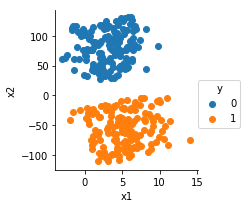

In [5]:
fg = sns.FacetGrid(data=data, hue='y', hue_order=[0,1])
fg.map(plt.scatter, 'x1', 'x2').add_legend()
plt.show()

In [6]:
# gradient descent method

In [7]:
data.head()

,x1,x2,y
0,3.398648,79.194669,0
1,-1.749324,110.410357,0
2,7.061147,81.486027,0
3,1.953700,71.131454,0
4,5.700520,46.254951,0


In [8]:
w = [0]*3 #三维
a = 0.01
stop_condition = 0.00001
x_t = np.concatenate((data[['x1', 'x2']].values, np.array([1] * len(data)).reshape((len(data), 1))), axis=1)

In [9]:
x_t

array([[  3.39864847e+00,   7.91946694e+01,   1.00000000e+00],
       [ -1.74932353e+00,   1.10410357e+02,   1.00000000e+00],
       [  7.06114709e+00,   8.14860271e+01,   1.00000000e+00],
       [  1.95369991e+00,   7.11314536e+01,   1.00000000e+00],
       [  5.70051956e+00,   4.62549512e+01,   1.00000000e+00],
       [  1.41943381e+00,   8.96240317e+01,   1.00000000e+00],
       [  3.86994357e+00,   1.07449598e+02,   1.00000000e+00],
       [  4.71521060e+00,   4.87866675e+01,   1.00000000e+00],
       [  6.04784632e+00,   9.10737125e+01,   1.00000000e+00],
       [  5.18192222e+00,   1.10818413e+02,   1.00000000e+00],
       [ -1.73738423e+00,   1.13055295e+02,   1.00000000e+00],
       [ -2.65319557e+00,   6.24412503e+01,   1.00000000e+00],
       [  3.80432718e+00,   4.74389974e+01,   1.00000000e+00],
       [  2.90517865e+00,   1.24887748e+02,   1.00000000e+00],
       [  4.76720890e+00,   9.72527053e+01,   1.00000000e+00],
       [  4.27415341e+00,   7.55953890e+01,   1.0000000

In [10]:
def exp_function(a):
    return(1/(1+math.exp(np.sum(a))))

In [11]:
y_guji = np.apply_along_axis(exp_function, 1, x_t*w*(-1))

In [12]:
w_dif = []
for i in range(len(w)):
    w_dif.append(np.sum(x_t[:,i]*(data.y.values + y_guji*(-1)))/len(data)*a)

In [13]:
print("w_dif :", w_dif)

w_dif : [0.0051667451886650137, -0.3412060183020747, 0.0]


In [14]:
np.sum(abs(np.array(w_dif)) > 0.0001)

2

In [15]:
w_dif

[0.0051667451886650137, -0.3412060183020747, 0.0]

In [16]:
np.sum([np.array(w), np.array(w_dif)], axis = 0)

array([ 0.00516675, -0.34120602,  0.        ])

In [28]:
w = [0]*3
a = 0.0001
stop_condition = 0.000001

condition = 1

while condition:
    y_guji = np.apply_along_axis(exp_function, 1, x_t*w*(-1))
    w_dif = []
    for i in range(len(w)):
        w_dif.append((np.sum(x_t[:,i]*(data.y.values - y_guji)))/len(data)*a)
    if np.sum(abs(np.array(w_dif)) < stop_condition) == 3:
        condition = 0
    else:
        w = np.sum([np.array(w), np.array(w_dif)], axis = 0)
    print(w)

[  5.16674519e-05  -3.41206018e-03   0.00000000e+00]
[  1.02226492e-04  -6.34723704e-03   1.03719403e-06]
[  1.51683176e-04  -8.89044254e-03   2.89614877e-06]
[  2.00006790e-04  -1.11178004e-02   5.37790001e-06]
[  2.47187451e-04  -1.30911424e-02   8.32322676e-06]
[  2.93244243e-04  -1.48587087e-02   1.16121781e-05]
[  3.38217588e-04  -1.64576971e-02   1.51563551e-05]
[  3.82160064e-04  -1.79168537e-02   1.88908419e-05]
[  4.25129512e-04  -1.92585856e-02   2.27677158e-05]
[  4.67184632e-04  -2.05005594e-02   2.67512737e-05]
[  5.08382433e-04  -2.16568749e-02   3.08146320e-05]
[  5.48776886e-04  -2.27389226e-02   3.49373290e-05]
[  5.88418327e-04  -2.37560114e-02   3.91036290e-05]
[  6.27353282e-04  -2.47158321e-02   4.33013149e-05]
[  6.65624534e-04  -2.56248027e-02   4.75208196e-05]
[  7.03271324e-04  -2.64883291e-02   5.17545936e-05]
[  7.40329603e-04  -2.73110034e-02   5.59966399e-05]
[  7.76832311e-04  -2.80967572e-02   6.02421674e-05]
[  8.12809648e-04  -2.88489811e-02   6.4487330

[ 0.01625738 -0.11600781  0.00239784]
[ 0.01626748 -0.11603674  0.00239936]
[ 0.01627758 -0.11606565  0.00240087]
[ 0.01628768 -0.11609453  0.00240238]
[ 0.01629778 -0.1161234   0.0024039 ]
[ 0.01630787 -0.11615224  0.00240541]
[ 0.01631796 -0.11618107  0.00240692]
[ 0.01632804 -0.11620987  0.00240843]
[ 0.01633812 -0.11623865  0.00240994]
[ 0.0163482  -0.11626741  0.00241145]
[ 0.01635828 -0.11629615  0.00241296]
[ 0.01636835 -0.11632488  0.00241447]
[ 0.01637842 -0.11635358  0.00241598]
[ 0.01638848 -0.11638226  0.00241749]
[ 0.01639854 -0.11641092  0.002419  ]
[ 0.0164086  -0.11643955  0.0024205 ]
[ 0.01641866 -0.11646817  0.00242201]
[ 0.01642871 -0.11649677  0.00242352]
[ 0.01643876 -0.11652535  0.00242502]
[ 0.0164488  -0.11655391  0.00242653]
[ 0.01645884 -0.11658245  0.00242803]
[ 0.01646888 -0.11661097  0.00242953]
[ 0.01647892 -0.11663946  0.00243104]
[ 0.01648895 -0.11666794  0.00243254]
[ 0.01649898 -0.1166964   0.00243404]
[ 0.01650901 -0.11672484  0.00243554]
[ 0.01651903

[ 0.02509459 -0.13799506  0.00370208]
[ 0.02510247 -0.13801239  0.00370322]
[ 0.02511036 -0.1380297   0.00370437]
[ 0.02511825 -0.13804701  0.00370552]
[ 0.02512613 -0.13806431  0.00370667]
[ 0.02513401 -0.1380816   0.00370781]
[ 0.02514189 -0.13809889  0.00370896]
[ 0.02514977 -0.13811617  0.0037101 ]
[ 0.02515765 -0.13813345  0.00371125]
[ 0.02516552 -0.13815071  0.0037124 ]
[ 0.0251734  -0.13816797  0.00371354]
[ 0.02518127 -0.13818523  0.00371469]
[ 0.02518914 -0.13820248  0.00371583]
[ 0.02519701 -0.13821972  0.00371698]
[ 0.02520488 -0.13823695  0.00371812]
[ 0.02521275 -0.13825418  0.00371926]
[ 0.02522061 -0.13827141  0.00372041]
[ 0.02522848 -0.13828862  0.00372155]
[ 0.02523634 -0.13830583  0.00372269]
[ 0.0252442  -0.13832303  0.00372384]
[ 0.02525206 -0.13834023  0.00372498]
[ 0.02525992 -0.13835742  0.00372612]
[ 0.02526777 -0.1383746   0.00372726]
[ 0.02527563 -0.13839178  0.00372841]
[ 0.02528348 -0.13840895  0.00372955]
[ 0.02529133 -0.13842611  0.00373069]
[ 0.02529918

[ 0.03234859 -0.15274722  0.00474686]
[ 0.03235527 -0.15275988  0.00474781]
[ 0.03236196 -0.15277253  0.00474877]
[ 0.03236864 -0.15278518  0.00474972]
[ 0.03237532 -0.15279783  0.00475067]
[ 0.032382   -0.15281047  0.00475163]
[ 0.03238868 -0.15282311  0.00475258]
[ 0.03239536 -0.15283575  0.00475353]
[ 0.03240204 -0.15284838  0.00475449]
[ 0.03240871 -0.15286101  0.00475544]
[ 0.03241539 -0.15287363  0.00475639]
[ 0.03242206 -0.15288626  0.00475734]
[ 0.03242874 -0.15289888  0.0047583 ]
[ 0.03243541 -0.15291149  0.00475925]
[ 0.03244208 -0.15292411  0.0047602 ]
[ 0.03244875 -0.15293672  0.00476115]
[ 0.03245542 -0.15294932  0.0047621 ]
[ 0.03246209 -0.15296193  0.00476305]
[ 0.03246876 -0.15297453  0.00476401]
[ 0.03247543 -0.15298713  0.00476496]
[ 0.03248209 -0.15299972  0.00476591]
[ 0.03248876 -0.15301231  0.00476686]
[ 0.03249542 -0.1530249   0.00476781]
[ 0.03250209 -0.15303748  0.00476876]
[ 0.03250875 -0.15305006  0.00476971]
[ 0.03251541 -0.15306264  0.00477066]
[ 0.03252207

[ 0.03859797 -0.16399157  0.00563243]
[ 0.03860385 -0.16400166  0.00563326]
[ 0.03860974 -0.16401174  0.00563408]
[ 0.03861562 -0.16402183  0.00563491]
[ 0.0386215  -0.16403191  0.00563574]
[ 0.03862738 -0.16404199  0.00563657]
[ 0.03863327 -0.16405206  0.0056374 ]
[ 0.03863915 -0.16406214  0.00563822]
[ 0.03864503 -0.16407221  0.00563905]
[ 0.0386509  -0.16408228  0.00563988]
[ 0.03865678 -0.16409235  0.00564071]
[ 0.03866266 -0.16410241  0.00564153]
[ 0.03866854 -0.16411248  0.00564236]
[ 0.03867441 -0.16412254  0.00564319]
[ 0.03868029 -0.1641326   0.00564401]
[ 0.03868616 -0.16414266  0.00564484]
[ 0.03869204 -0.16415272  0.00564567]
[ 0.03869791 -0.16416277  0.0056465 ]
[ 0.03870378 -0.16417282  0.00564732]
[ 0.03870966 -0.16418287  0.00564815]
[ 0.03871553 -0.16419292  0.00564897]
[ 0.0387214  -0.16420297  0.0056498 ]
[ 0.03872727 -0.16421301  0.00565063]
[ 0.03873314 -0.16422305  0.00565145]
[ 0.03873901 -0.16423309  0.00565228]
[ 0.03874487 -0.16424313  0.0056531 ]
[ 0.03875074

[ 0.04419534 -0.17323047  0.00641631]
[ 0.04420063 -0.1732389   0.00641705]
[ 0.04420592 -0.17324732  0.00641778]
[ 0.04421121 -0.17325574  0.00641852]
[ 0.0442165  -0.17326416  0.00641926]
[ 0.04422179 -0.17327258  0.00641999]
[ 0.04422708 -0.17328099  0.00642073]
[ 0.04423237 -0.17328941  0.00642147]
[ 0.04423766 -0.17329782  0.00642221]
[ 0.04424295 -0.17330624  0.00642294]
[ 0.04424824 -0.17331465  0.00642368]
[ 0.04425352 -0.17332306  0.00642442]
[ 0.04425881 -0.17333147  0.00642515]
[ 0.0442641  -0.17333987  0.00642589]
[ 0.04426938 -0.17334828  0.00642663]
[ 0.04427467 -0.17335668  0.00642736]
[ 0.04427995 -0.17336509  0.0064281 ]
[ 0.04428523 -0.17337349  0.00642883]
[ 0.04429052 -0.17338189  0.00642957]
[ 0.0442958  -0.17339029  0.00643031]
[ 0.04430108 -0.17339869  0.00643104]
[ 0.04430636 -0.17340708  0.00643178]
[ 0.04431165 -0.17341548  0.00643251]
[ 0.04431693 -0.17342387  0.00643325]
[ 0.04432221 -0.17343226  0.00643399]
[ 0.04432749 -0.17344066  0.00643472]
[ 0.04433277

[ 0.04922506 -0.18100593  0.00711439]
[ 0.0492299  -0.1810132   0.00711506]
[ 0.04923473 -0.18102046  0.00711573]
[ 0.04923957 -0.18102773  0.00711639]
[ 0.0492444  -0.18103499  0.00711706]
[ 0.04924923 -0.18104225  0.00711773]
[ 0.04925407 -0.18104951  0.0071184 ]
[ 0.0492589  -0.18105677  0.00711907]
[ 0.04926373 -0.18106403  0.00711973]
[ 0.04926856 -0.18107128  0.0071204 ]
[ 0.04927339 -0.18107854  0.00712107]
[ 0.04927822 -0.1810858   0.00712174]
[ 0.04928305 -0.18109305  0.00712241]
[ 0.04928788 -0.1811003   0.00712307]
[ 0.04929271 -0.18110756  0.00712374]
[ 0.04929754 -0.18111481  0.00712441]
[ 0.04930237 -0.18112206  0.00712508]
[ 0.0493072  -0.18112931  0.00712574]
[ 0.04931202 -0.18113656  0.00712641]
[ 0.04931685 -0.1811438   0.00712708]
[ 0.04932168 -0.18115105  0.00712775]
[ 0.0493265  -0.1811583   0.00712841]
[ 0.04933133 -0.18116554  0.00712908]
[ 0.04933616 -0.18117278  0.00712975]
[ 0.04934098 -0.18118003  0.00713041]
[ 0.04934581 -0.18118727  0.00713108]
[ 0.04935063

[ 0.05386743 -0.18781808  0.00775414]
[ 0.0538719  -0.18782448  0.00775475]
[ 0.05387636 -0.18783087  0.00775537]
[ 0.05388082 -0.18783727  0.00775598]
[ 0.05388528 -0.18784366  0.00775659]
[ 0.05388974 -0.18785006  0.00775721]
[ 0.0538942  -0.18785645  0.00775782]
[ 0.05389866 -0.18786285  0.00775843]
[ 0.05390312 -0.18786924  0.00775904]
[ 0.05390758 -0.18787563  0.00775966]
[ 0.05391204 -0.18788202  0.00776027]
[ 0.0539165  -0.18788841  0.00776088]
[ 0.05392095 -0.1878948   0.00776149]
[ 0.05392541 -0.18790119  0.00776211]
[ 0.05392987 -0.18790757  0.00776272]
[ 0.05393433 -0.18791396  0.00776333]
[ 0.05393878 -0.18792035  0.00776394]
[ 0.05394324 -0.18792673  0.00776455]
[ 0.0539477  -0.18793311  0.00776517]
[ 0.05395215 -0.1879395   0.00776578]
[ 0.05395661 -0.18794588  0.00776639]
[ 0.05396106 -0.18795226  0.007767  ]
[ 0.05396552 -0.18795864  0.00776761]
[ 0.05396997 -0.18796503  0.00776823]
[ 0.05397443 -0.1879714   0.00776884]
[ 0.05397888 -0.18797778  0.00776945]
[ 0.05398333

[ 0.05816996 -0.19386536  0.00834363]
[ 0.05817411 -0.19387108  0.00834419]
[ 0.05817826 -0.1938768   0.00834476]
[ 0.05818241 -0.19388252  0.00834533]
[ 0.05818656 -0.19388825  0.0083459 ]
[ 0.05819071 -0.19389397  0.00834646]
[ 0.05819486 -0.19389969  0.00834703]
[ 0.05819901 -0.19390541  0.0083476 ]
[ 0.05820316 -0.19391112  0.00834816]
[ 0.05820731 -0.19391684  0.00834873]
[ 0.05821146 -0.19392256  0.0083493 ]
[ 0.05821561 -0.19392828  0.00834986]
[ 0.05821976 -0.19393399  0.00835043]
[ 0.05822391 -0.19393971  0.008351  ]
[ 0.05822806 -0.19394543  0.00835157]
[ 0.0582322  -0.19395114  0.00835213]
[ 0.05823635 -0.19395685  0.0083527 ]
[ 0.0582405  -0.19396257  0.00835327]
[ 0.05824465 -0.19396828  0.00835383]
[ 0.05824879 -0.19397399  0.0083544 ]
[ 0.05825294 -0.1939797   0.00835497]
[ 0.05825709 -0.19398542  0.00835553]
[ 0.05826123 -0.19399113  0.0083561 ]
[ 0.05826538 -0.19399684  0.00835666]
[ 0.05826952 -0.19400255  0.00835723]
[ 0.05827367 -0.19400825  0.0083578 ]
[ 0.05827781

[ 0.06218277 -0.19930414  0.00889077]
[ 0.06218666 -0.19930932  0.0088913 ]
[ 0.06219055 -0.19931451  0.00889183]
[ 0.06219444 -0.19931969  0.00889236]
[ 0.06219833 -0.19932487  0.00889289]
[ 0.06220221 -0.19933005  0.00889342]
[ 0.0622061  -0.19933523  0.00889394]
[ 0.06220999 -0.19934041  0.00889447]
[ 0.06221387 -0.19934559  0.008895  ]
[ 0.06221776 -0.19935077  0.00889553]
[ 0.06222165 -0.19935595  0.00889606]
[ 0.06222553 -0.19936113  0.00889659]
[ 0.06222942 -0.19936631  0.00889712]
[ 0.0622333  -0.19937149  0.00889765]
[ 0.06223719 -0.19937666  0.00889817]
[ 0.06224108 -0.19938184  0.0088987 ]
[ 0.06224496 -0.19938702  0.00889923]
[ 0.06224884 -0.19939219  0.00889976]
[ 0.06225273 -0.19939737  0.00890029]
[ 0.06225661 -0.19940254  0.00890082]
[ 0.0622605  -0.19940772  0.00890134]
[ 0.06226438 -0.19941289  0.00890187]
[ 0.06226826 -0.19941806  0.0089024 ]
[ 0.06227215 -0.19942324  0.00890293]
[ 0.06227603 -0.19942841  0.00890346]
[ 0.06227991 -0.19943358  0.00890399]
[ 0.06228379

[ 0.06594025 -0.20424042  0.00940102]
[ 0.06594391 -0.20424516  0.00940151]
[ 0.06594757 -0.2042499   0.00940201]
[ 0.06595123 -0.20425464  0.00940251]
[ 0.06595489 -0.20425938  0.009403  ]
[ 0.06595855 -0.20426413  0.0094035 ]
[ 0.06596221 -0.20426887  0.00940399]
[ 0.06596588 -0.2042736   0.00940449]
[ 0.06596954 -0.20427834  0.00940499]
[ 0.0659732  -0.20428308  0.00940548]
[ 0.06597686 -0.20428782  0.00940598]
[ 0.06598052 -0.20429256  0.00940647]
[ 0.06598417 -0.2042973   0.00940697]
[ 0.06598783 -0.20430203  0.00940747]
[ 0.06599149 -0.20430677  0.00940796]
[ 0.06599515 -0.20431151  0.00940846]
[ 0.06599881 -0.20431624  0.00940895]
[ 0.06600247 -0.20432098  0.00940945]
[ 0.06600613 -0.20432571  0.00940995]
[ 0.06600978 -0.20433045  0.00941044]
[ 0.06601344 -0.20433518  0.00941094]
[ 0.0660171  -0.20433992  0.00941143]
[ 0.06602076 -0.20434465  0.00941193]
[ 0.06602441 -0.20434938  0.00941242]
[ 0.06602807 -0.20435411  0.00941292]
[ 0.06603173 -0.20435885  0.00941342]
[ 0.06603538

[ 0.06788385 -0.20673956  0.00966422]
[ 0.0678874  -0.20674409  0.0096647 ]
[ 0.06789095 -0.20674862  0.00966518]
[ 0.0678945  -0.20675316  0.00966566]
[ 0.06789805 -0.20675769  0.00966614]
[ 0.0679016  -0.20676222  0.00966662]
[ 0.06790515 -0.20676676  0.0096671 ]
[ 0.0679087  -0.20677129  0.00966758]
[ 0.06791225 -0.20677582  0.00966806]
[ 0.0679158  -0.20678035  0.00966854]
[ 0.06791935 -0.20678488  0.00966902]
[ 0.0679229  -0.20678941  0.00966951]
[ 0.06792645 -0.20679394  0.00966999]
[ 0.06793    -0.20679847  0.00967047]
[ 0.06793355 -0.206803    0.00967095]
[ 0.0679371  -0.20680753  0.00967143]
[ 0.06794065 -0.20681206  0.00967191]
[ 0.06794419 -0.20681659  0.00967239]
[ 0.06794774 -0.20682111  0.00967287]
[ 0.06795129 -0.20682564  0.00967335]
[ 0.06795484 -0.20683017  0.00967383]
[ 0.06795838 -0.2068347   0.00967431]
[ 0.06796193 -0.20683922  0.00967479]
[ 0.06796548 -0.20684375  0.00967527]
[ 0.06796902 -0.20684827  0.00967575]
[ 0.06797257 -0.2068528   0.00967622]
[ 0.06797612

[ 0.07122235 -0.21095265  0.01011525]
[ 0.07122572 -0.21095685  0.01011571]
[ 0.07122909 -0.21096106  0.01011616]
[ 0.07123246 -0.21096527  0.01011662]
[ 0.07123583 -0.21096947  0.01011707]
[ 0.0712392  -0.21097368  0.01011753]
[ 0.07124257 -0.21097788  0.01011798]
[ 0.07124594 -0.21098208  0.01011844]
[ 0.07124931 -0.21098629  0.01011889]
[ 0.07125268 -0.21099049  0.01011935]
[ 0.07125605 -0.21099469  0.0101198 ]
[ 0.07125942 -0.2109989   0.01012025]
[ 0.07126279 -0.2110031   0.01012071]
[ 0.07126616 -0.2110073   0.01012116]
[ 0.07126953 -0.2110115   0.01012162]
[ 0.0712729  -0.2110157   0.01012207]
[ 0.07127626 -0.21101991  0.01012253]
[ 0.07127963 -0.21102411  0.01012298]
[ 0.071283   -0.21102831  0.01012344]
[ 0.07128637 -0.21103251  0.01012389]
[ 0.07128974 -0.21103671  0.01012434]
[ 0.07129311 -0.21104091  0.0101248 ]
[ 0.07129647 -0.21104511  0.01012525]
[ 0.07129984 -0.2110493   0.01012571]
[ 0.07130321 -0.2110535   0.01012616]
[ 0.07130658 -0.2110577   0.01012662]
[ 0.07130994

[ 0.07450595 -0.21500513  0.01055764]
[ 0.07450915 -0.21500905  0.01055807]
[ 0.07451236 -0.21501296  0.0105585 ]
[ 0.07451556 -0.21501687  0.01055893]
[ 0.07451877 -0.21502079  0.01055936]
[ 0.07452197 -0.2150247   0.01055979]
[ 0.07452518 -0.21502861  0.01056023]
[ 0.07452838 -0.21503253  0.01056066]
[ 0.07453159 -0.21503644  0.01056109]
[ 0.07453479 -0.21504035  0.01056152]
[ 0.074538   -0.21504426  0.01056195]
[ 0.0745412  -0.21504817  0.01056238]
[ 0.0745444  -0.21505209  0.01056281]
[ 0.07454761 -0.215056    0.01056324]
[ 0.07455081 -0.21505991  0.01056367]
[ 0.07455401 -0.21506382  0.01056411]
[ 0.07455722 -0.21506773  0.01056454]
[ 0.07456042 -0.21507164  0.01056497]
[ 0.07456362 -0.21507555  0.0105654 ]
[ 0.07456683 -0.21507946  0.01056583]
[ 0.07457003 -0.21508337  0.01056626]
[ 0.07457323 -0.21508727  0.01056669]
[ 0.07457643 -0.21509118  0.01056712]
[ 0.07457963 -0.21509509  0.01056755]
[ 0.07458284 -0.215099    0.01056798]
[ 0.07458604 -0.21510291  0.01056841]
[ 0.07458924

[ 0.07763279 -0.21878641  0.01097786]
[ 0.07763585 -0.21879007  0.01097827]
[ 0.07763891 -0.21879373  0.01097868]
[ 0.07764196 -0.21879739  0.01097909]
[ 0.07764502 -0.21880105  0.0109795 ]
[ 0.07764808 -0.21880471  0.01097991]
[ 0.07765113 -0.21880837  0.01098032]
[ 0.07765419 -0.21881203  0.01098073]
[ 0.07765725 -0.21881569  0.01098114]
[ 0.0776603  -0.21881935  0.01098155]
[ 0.07766336 -0.21882301  0.01098196]
[ 0.07766641 -0.21882667  0.01098237]
[ 0.07766947 -0.21883033  0.01098278]
[ 0.07767252 -0.21883399  0.01098319]
[ 0.07767558 -0.21883764  0.0109836 ]
[ 0.07767863 -0.2188413   0.01098401]
[ 0.07768169 -0.21884496  0.01098442]
[ 0.07768474 -0.21884862  0.01098483]
[ 0.0776878  -0.21885228  0.01098524]
[ 0.07769085 -0.21885593  0.01098565]
[ 0.07769391 -0.21885959  0.01098606]
[ 0.07769696 -0.21886325  0.01098647]
[ 0.07770001 -0.2188669   0.01098688]
[ 0.07770307 -0.21887056  0.01098729]
[ 0.07770612 -0.21887422  0.0109877 ]
[ 0.07770918 -0.21887787  0.01098811]
[ 0.07771223

[ 0.08064213 -0.22235905  0.01138139]
[ 0.08064505 -0.22236249  0.01138179]
[ 0.08064797 -0.22236593  0.01138218]
[ 0.0806509  -0.22236937  0.01138257]
[ 0.08065382 -0.22237281  0.01138296]
[ 0.08065674 -0.22237624  0.01138335]
[ 0.08065966 -0.22237968  0.01138374]
[ 0.08066258 -0.22238312  0.01138413]
[ 0.0806655  -0.22238656  0.01138453]
[ 0.08066842 -0.22238999  0.01138492]
[ 0.08067134 -0.22239343  0.01138531]
[ 0.08067427 -0.22239687  0.0113857 ]
[ 0.08067719 -0.2224003   0.01138609]
[ 0.08068011 -0.22240374  0.01138648]
[ 0.08068303 -0.22240718  0.01138687]
[ 0.08068595 -0.22241061  0.01138726]
[ 0.08068887 -0.22241405  0.01138766]
[ 0.08069179 -0.22241748  0.01138805]
[ 0.08069471 -0.22242092  0.01138844]
[ 0.08069763 -0.22242435  0.01138883]
[ 0.08070055 -0.22242779  0.01138922]
[ 0.08070347 -0.22243122  0.01138961]
[ 0.08070638 -0.22243466  0.01139   ]
[ 0.0807093  -0.22243809  0.01139039]
[ 0.08071222 -0.22244152  0.01139078]
[ 0.08071514 -0.22244496  0.01139117]
[ 0.08071806

[ 0.08348004 -0.22567233  0.0117612 ]
[ 0.08348284 -0.22567557  0.01176157]
[ 0.08348564 -0.22567882  0.01176195]
[ 0.08348844 -0.22568206  0.01176232]
[ 0.08349124 -0.2256853   0.01176269]
[ 0.08349404 -0.22568855  0.01176307]
[ 0.08349684 -0.22569179  0.01176344]
[ 0.08349964 -0.22569504  0.01176382]
[ 0.08350244 -0.22569828  0.01176419]
[ 0.08350525 -0.22570152  0.01176457]
[ 0.08350805 -0.22570477  0.01176494]
[ 0.08351085 -0.22570801  0.01176532]
[ 0.08351365 -0.22571125  0.01176569]
[ 0.08351645 -0.2257145   0.01176606]
[ 0.08351925 -0.22571774  0.01176644]
[ 0.08352205 -0.22572098  0.01176681]
[ 0.08352485 -0.22572422  0.01176719]
[ 0.08352764 -0.22572747  0.01176756]
[ 0.08353044 -0.22573071  0.01176794]
[ 0.08353324 -0.22573395  0.01176831]
[ 0.08353604 -0.22573719  0.01176868]
[ 0.08353884 -0.22574043  0.01176906]
[ 0.08354164 -0.22574367  0.01176943]
[ 0.08354444 -0.22574691  0.01176981]
[ 0.08354724 -0.22575015  0.01177018]
[ 0.08355004 -0.22575339  0.01177056]
[ 0.08355283

[ 0.0862278  -0.22883184  0.01212829]
[ 0.08623049 -0.22883491  0.01212865]
[ 0.08623318 -0.22883798  0.01212901]
[ 0.08623587 -0.22884105  0.01212937]
[ 0.08623856 -0.22884412  0.01212973]
[ 0.08624125 -0.22884719  0.01213008]
[ 0.08624394 -0.22885026  0.01213044]
[ 0.08624663 -0.22885333  0.0121308 ]
[ 0.08624932 -0.2288564   0.01213116]
[ 0.08625201 -0.22885947  0.01213152]
[ 0.08625469 -0.22886254  0.01213188]
[ 0.08625738 -0.22886561  0.01213224]
[ 0.08626007 -0.22886868  0.0121326 ]
[ 0.08626276 -0.22887174  0.01213296]
[ 0.08626545 -0.22887481  0.01213331]
[ 0.08626814 -0.22887788  0.01213367]
[ 0.08627083 -0.22888095  0.01213403]
[ 0.08627352 -0.22888402  0.01213439]
[ 0.0862762  -0.22888709  0.01213475]
[ 0.08627889 -0.22889015  0.01213511]
[ 0.08628158 -0.22889322  0.01213547]
[ 0.08628427 -0.22889629  0.01213583]
[ 0.08628696 -0.22889936  0.01213619]
[ 0.08628965 -0.22890242  0.01213654]
[ 0.08629233 -0.22890549  0.0121369 ]
[ 0.08629502 -0.22890856  0.01213726]
[ 0.08629771

[ 0.0888613  -0.2318177   0.01247956]
[ 0.08886389 -0.23182062  0.0124799 ]
[ 0.08886647 -0.23182353  0.01248025]
[ 0.08886906 -0.23182645  0.01248059]
[ 0.08887165 -0.23182936  0.01248094]
[ 0.08887424 -0.23183228  0.01248128]
[ 0.08887683 -0.23183519  0.01248163]
[ 0.08887942 -0.23183811  0.01248197]
[ 0.088882   -0.23184102  0.01248232]
[ 0.08888459 -0.23184393  0.01248266]
[ 0.08888718 -0.23184685  0.01248301]
[ 0.08888977 -0.23184976  0.01248335]
[ 0.08889235 -0.23185268  0.0124837 ]
[ 0.08889494 -0.23185559  0.01248404]
[ 0.08889753 -0.2318585   0.01248439]
[ 0.08890012 -0.23186142  0.01248473]
[ 0.0889027  -0.23186433  0.01248508]
[ 0.08890529 -0.23186724  0.01248542]
[ 0.08890788 -0.23187016  0.01248577]
[ 0.08891047 -0.23187307  0.01248611]
[ 0.08891305 -0.23187598  0.01248646]
[ 0.08891564 -0.23187889  0.0124868 ]
[ 0.08891823 -0.23188181  0.01248715]
[ 0.08892081 -0.23188472  0.01248749]
[ 0.0889234  -0.23188763  0.01248784]
[ 0.08892598 -0.23189054  0.01248818]
[ 0.08892857

[ 0.09140002 -0.23465903  0.0128177 ]
[ 0.09140252 -0.2346618   0.01281803]
[ 0.09140501 -0.23466458  0.01281837]
[ 0.09140751 -0.23466735  0.0128187 ]
[ 0.09141    -0.23467013  0.01281903]
[ 0.0914125  -0.2346729   0.01281936]
[ 0.09141499 -0.23467568  0.0128197 ]
[ 0.09141749 -0.23467845  0.01282003]
[ 0.09141998 -0.23468122  0.01282036]
[ 0.09142247 -0.234684    0.01282069]
[ 0.09142497 -0.23468677  0.01282102]
[ 0.09142746 -0.23468955  0.01282136]
[ 0.09142996 -0.23469232  0.01282169]
[ 0.09143245 -0.23469509  0.01282202]
[ 0.09143494 -0.23469787  0.01282235]
[ 0.09143744 -0.23470064  0.01282268]
[ 0.09143993 -0.23470341  0.01282301]
[ 0.09144243 -0.23470619  0.01282335]
[ 0.09144492 -0.23470896  0.01282368]
[ 0.09144741 -0.23471173  0.01282401]
[ 0.09144991 -0.2347145   0.01282434]
[ 0.0914524  -0.23471728  0.01282467]
[ 0.09145489 -0.23472005  0.01282501]
[ 0.09145739 -0.23472282  0.01282534]
[ 0.09145988 -0.23472559  0.01282567]
[ 0.09146237 -0.23472837  0.012826  ]
[ 0.09146486

[ 0.09384642 -0.2373643   0.01314312]
[ 0.09384883 -0.23736694  0.01314344]
[ 0.09385124 -0.23736959  0.01314377]
[ 0.09385365 -0.23737224  0.01314409]
[ 0.09385606 -0.23737489  0.01314441]
[ 0.09385846 -0.23737753  0.01314473]
[ 0.09386087 -0.23738018  0.01314505]
[ 0.09386328 -0.23738283  0.01314537]
[ 0.09386569 -0.23738548  0.01314569]
[ 0.0938681  -0.23738812  0.01314601]
[ 0.0938705  -0.23739077  0.01314633]
[ 0.09387291 -0.23739342  0.01314665]
[ 0.09387532 -0.23739606  0.01314697]
[ 0.09387773 -0.23739871  0.01314729]
[ 0.09388013 -0.23740136  0.01314761]
[ 0.09388254 -0.237404    0.01314793]
[ 0.09388495 -0.23740665  0.01314825]
[ 0.09388736 -0.2374093   0.01314857]
[ 0.09388976 -0.23741194  0.01314889]
[ 0.09389217 -0.23741459  0.01314921]
[ 0.09389458 -0.23741723  0.01314953]
[ 0.09389698 -0.23741988  0.01314985]
[ 0.09389939 -0.23742253  0.01315017]
[ 0.0939018  -0.23742517  0.01315049]
[ 0.0939042  -0.23742782  0.01315081]
[ 0.09390661 -0.23743046  0.01315113]
[ 0.09390902

[ 0.09622136 -0.23996126  0.01345866]
[ 0.09622369 -0.23996379  0.01345897]
[ 0.09622602 -0.23996632  0.01345928]
[ 0.09622835 -0.23996886  0.01345959]
[ 0.09623068 -0.23997139  0.0134599 ]
[ 0.096233   -0.23997392  0.01346021]
[ 0.09623533 -0.23997645  0.01346052]
[ 0.09623766 -0.23997898  0.01346083]
[ 0.09623999 -0.23998151  0.01346114]
[ 0.09624231 -0.23998404  0.01346145]
[ 0.09624464 -0.23998657  0.01346176]
[ 0.09624697 -0.23998911  0.01346206]
[ 0.0962493  -0.23999164  0.01346237]
[ 0.09625162 -0.23999417  0.01346268]
[ 0.09625395 -0.2399967   0.01346299]
[ 0.09625628 -0.23999923  0.0134633 ]
[ 0.0962586  -0.24000176  0.01346361]
[ 0.09626093 -0.24000429  0.01346392]
[ 0.09626326 -0.24000682  0.01346423]
[ 0.09626558 -0.24000935  0.01346454]
[ 0.09626791 -0.24001188  0.01346485]
[ 0.09627024 -0.24001441  0.01346515]
[ 0.09627256 -0.24001694  0.01346546]
[ 0.09627489 -0.24001947  0.01346577]
[ 0.09627722 -0.240022    0.01346608]
[ 0.09627954 -0.24002452  0.01346639]
[ 0.09628187

[ 0.09850934 -0.24243705  0.01376232]
[ 0.09851159 -0.24243948  0.01376262]
[ 0.09851385 -0.24244191  0.01376292]
[ 0.0985161  -0.24244433  0.01376322]
[ 0.09851835 -0.24244676  0.01376351]
[ 0.09852061 -0.24244918  0.01376381]
[ 0.09852286 -0.24245161  0.01376411]
[ 0.09852511 -0.24245403  0.01376441]
[ 0.09852737 -0.24245646  0.01376471]
[ 0.09852962 -0.24245888  0.01376501]
[ 0.09853187 -0.24246131  0.01376531]
[ 0.09853412 -0.24246373  0.01376561]
[ 0.09853638 -0.24246616  0.0137659 ]
[ 0.09853863 -0.24246858  0.0137662 ]
[ 0.09854088 -0.24247101  0.0137665 ]
[ 0.09854313 -0.24247343  0.0137668 ]
[ 0.09854539 -0.24247586  0.0137671 ]
[ 0.09854764 -0.24247828  0.0137674 ]
[ 0.09854989 -0.24248071  0.0137677 ]
[ 0.09855214 -0.24248313  0.013768  ]
[ 0.09855439 -0.24248556  0.01376829]
[ 0.09855665 -0.24248798  0.01376859]
[ 0.0985589  -0.2424904   0.01376889]
[ 0.09856115 -0.24249283  0.01376919]
[ 0.0985634  -0.24249525  0.01376949]
[ 0.09856565 -0.24249767  0.01376979]
[ 0.0985679 

[ 0.10072089 -0.24480684  0.01405554]
[ 0.10072307 -0.24480917  0.01405583]
[ 0.10072526 -0.2448115   0.01405611]
[ 0.10072744 -0.24481383  0.0140564 ]
[ 0.10072962 -0.24481616  0.01405669]
[ 0.10073181 -0.24481849  0.01405698]
[ 0.10073399 -0.24482082  0.01405727]
[ 0.10073617 -0.24482314  0.01405756]
[ 0.10073836 -0.24482547  0.01405785]
[ 0.10074054 -0.2448278   0.01405814]
[ 0.10074272 -0.24483013  0.01405843]
[ 0.10074491 -0.24483246  0.01405872]
[ 0.10074709 -0.24483479  0.01405901]
[ 0.10074927 -0.24483711  0.0140593 ]
[ 0.10075146 -0.24483944  0.01405959]
[ 0.10075364 -0.24484177  0.01405988]
[ 0.10075582 -0.2448441   0.01406017]
[ 0.100758   -0.24484642  0.01406045]
[ 0.10076019 -0.24484875  0.01406074]
[ 0.10076237 -0.24485108  0.01406103]
[ 0.10076455 -0.24485341  0.01406132]
[ 0.10076673 -0.24485573  0.01406161]
[ 0.10076892 -0.24485806  0.0140619 ]
[ 0.1007711  -0.24486039  0.01406219]
[ 0.10077328 -0.24486271  0.01406248]
[ 0.10077546 -0.24486504  0.01406277]
[ 0.10077765

[ 0.10287595 -0.24709495  0.014341  ]
[ 0.10287807 -0.24709719  0.01434128]
[ 0.10288019 -0.24709943  0.01434156]
[ 0.10288231 -0.24710167  0.01434184]
[ 0.10288443 -0.24710391  0.01434212]
[ 0.10288655 -0.24710615  0.0143424 ]
[ 0.10288866 -0.24710839  0.01434268]
[ 0.10289078 -0.24711063  0.01434296]
[ 0.1028929  -0.24711286  0.01434324]
[ 0.10289502 -0.2471151   0.01434352]
[ 0.10289714 -0.24711734  0.0143438 ]
[ 0.10289925 -0.24711958  0.01434409]
[ 0.10290137 -0.24712182  0.01434437]
[ 0.10290349 -0.24712406  0.01434465]
[ 0.10290561 -0.24712629  0.01434493]
[ 0.10290772 -0.24712853  0.01434521]
[ 0.10290984 -0.24713077  0.01434549]
[ 0.10291196 -0.24713301  0.01434577]
[ 0.10291408 -0.24713524  0.01434605]
[ 0.10291619 -0.24713748  0.01434633]
[ 0.10291831 -0.24713972  0.01434661]
[ 0.10292043 -0.24714196  0.01434689]
[ 0.10292254 -0.24714419  0.01434717]
[ 0.10292466 -0.24714643  0.01434745]
[ 0.10292678 -0.24714867  0.01434773]
[ 0.10292889 -0.24715091  0.01434801]
[ 0.10293101

[ 0.10495727 -0.24928569  0.01461646]
[ 0.10495933 -0.24928785  0.01461673]
[ 0.10496139 -0.24929001  0.01461701]
[ 0.10496345 -0.24929216  0.01461728]
[ 0.1049655  -0.24929432  0.01461755]
[ 0.10496756 -0.24929648  0.01461782]
[ 0.10496962 -0.24929863  0.01461809]
[ 0.10497167 -0.24930079  0.01461837]
[ 0.10497373 -0.24930294  0.01461864]
[ 0.10497579 -0.2493051   0.01461891]
[ 0.10497785 -0.24930725  0.01461918]
[ 0.1049799  -0.24930941  0.01461946]
[ 0.10498196 -0.24931157  0.01461973]
[ 0.10498402 -0.24931372  0.01462   ]
[ 0.10498607 -0.24931588  0.01462027]
[ 0.10498813 -0.24931803  0.01462054]
[ 0.10499018 -0.24932019  0.01462082]
[ 0.10499224 -0.24932234  0.01462109]
[ 0.1049943  -0.2493245   0.01462136]
[ 0.10499635 -0.24932665  0.01462163]
[ 0.10499841 -0.24932881  0.0146219 ]
[ 0.10500047 -0.24933096  0.01462218]
[ 0.10500252 -0.24933312  0.01462245]
[ 0.10500458 -0.24933527  0.01462272]
[ 0.10500663 -0.24933743  0.01462299]
[ 0.10500869 -0.24933958  0.01462326]
[ 0.10501075

[ 0.10698759 -0.25140535  0.01488496]
[ 0.10698959 -0.25140743  0.01488523]
[ 0.10699159 -0.25140951  0.01488549]
[ 0.10699359 -0.25141159  0.01488575]
[ 0.10699559 -0.25141366  0.01488602]
[ 0.10699759 -0.25141574  0.01488628]
[ 0.10699959 -0.25141782  0.01488655]
[ 0.10700159 -0.2514199   0.01488681]
[ 0.10700359 -0.25142198  0.01488708]
[ 0.10700559 -0.25142406  0.01488734]
[ 0.10700759 -0.25142614  0.0148876 ]
[ 0.10700959 -0.25142822  0.01488787]
[ 0.10701158 -0.2514303   0.01488813]
[ 0.10701358 -0.25143237  0.0148884 ]
[ 0.10701558 -0.25143445  0.01488866]
[ 0.10701758 -0.25143653  0.01488893]
[ 0.10701958 -0.25143861  0.01488919]
[ 0.10702158 -0.25144069  0.01488945]
[ 0.10702358 -0.25144277  0.01488972]
[ 0.10702558 -0.25144484  0.01488998]
[ 0.10702758 -0.25144692  0.01489025]
[ 0.10702957 -0.251449    0.01489051]
[ 0.10703157 -0.25145108  0.01489078]
[ 0.10703357 -0.25145316  0.01489104]
[ 0.10703557 -0.25145523  0.0148913 ]
[ 0.10703757 -0.25145731  0.01489157]
[ 0.10703957

[ 0.10804563 -0.25250333  0.0150248 ]
[ 0.1080476  -0.25250537  0.01502506]
[ 0.10804957 -0.25250741  0.01502532]
[ 0.10805154 -0.25250945  0.01502558]
[ 0.10805351 -0.25251149  0.01502584]
[ 0.10805548 -0.25251353  0.0150261 ]
[ 0.10805745 -0.25251557  0.01502636]
[ 0.10805942 -0.25251761  0.01502662]
[ 0.10806139 -0.25251965  0.01502688]
[ 0.10806336 -0.25252169  0.01502714]
[ 0.10806533 -0.25252373  0.0150274 ]
[ 0.1080673  -0.25252577  0.01502767]
[ 0.10806927 -0.25252781  0.01502793]
[ 0.10807124 -0.25252985  0.01502819]
[ 0.10807321 -0.25253189  0.01502845]
[ 0.10807518 -0.25253393  0.01502871]
[ 0.10807715 -0.25253597  0.01502897]
[ 0.10807912 -0.25253801  0.01502923]
[ 0.10808109 -0.25254005  0.01502949]
[ 0.10808306 -0.25254209  0.01502975]
[ 0.10808502 -0.25254413  0.01503001]
[ 0.10808699 -0.25254616  0.01503027]
[ 0.10808896 -0.2525482   0.01503053]
[ 0.10809093 -0.25255024  0.01503079]
[ 0.1080929  -0.25255228  0.01503105]
[ 0.10809487 -0.25255432  0.01503131]
[ 0.10809684

[ 0.10992434 -0.25444212  0.01527298]
[ 0.10992626 -0.25444409  0.01527323]
[ 0.10992818 -0.25444607  0.01527349]
[ 0.1099301  -0.25444804  0.01527374]
[ 0.10993202 -0.25445001  0.015274  ]
[ 0.10993394 -0.25445199  0.01527425]
[ 0.10993586 -0.25445396  0.0152745 ]
[ 0.10993778 -0.25445594  0.01527476]
[ 0.1099397  -0.25445791  0.01527501]
[ 0.10994162 -0.25445988  0.01527526]
[ 0.10994354 -0.25446186  0.01527552]
[ 0.10994546 -0.25446383  0.01527577]
[ 0.10994738 -0.2544658   0.01527602]
[ 0.1099493  -0.25446778  0.01527628]
[ 0.10995121 -0.25446975  0.01527653]
[ 0.10995313 -0.25447172  0.01527678]
[ 0.10995505 -0.2544737   0.01527704]
[ 0.10995697 -0.25447567  0.01527729]
[ 0.10995889 -0.25447764  0.01527754]
[ 0.10996081 -0.25447961  0.0152778 ]
[ 0.10996273 -0.25448159  0.01527805]
[ 0.10996465 -0.25448356  0.0152783 ]
[ 0.10996656 -0.25448553  0.01527856]
[ 0.10996848 -0.25448751  0.01527881]
[ 0.1099704  -0.25448948  0.01527906]
[ 0.10997232 -0.25449145  0.01527932]
[ 0.10997424

[ 0.1118133  -0.25637786  0.01552235]
[ 0.11181517 -0.25637977  0.0155226 ]
[ 0.11181704 -0.25638168  0.01552285]
[ 0.11181891 -0.25638358  0.01552309]
[ 0.11182078 -0.25638549  0.01552334]
[ 0.11182265 -0.2563874   0.01552359]
[ 0.11182452 -0.25638931  0.01552383]
[ 0.11182639 -0.25639122  0.01552408]
[ 0.11182826 -0.25639313  0.01552433]
[ 0.11183013 -0.25639504  0.01552457]
[ 0.111832   -0.25639695  0.01552482]
[ 0.11183387 -0.25639886  0.01552507]
[ 0.11183574 -0.25640077  0.01552531]
[ 0.11183761 -0.25640268  0.01552556]
[ 0.11183947 -0.25640459  0.01552581]
[ 0.11184134 -0.2564065   0.01552605]
[ 0.11184321 -0.2564084   0.0155263 ]
[ 0.11184508 -0.25641031  0.01552655]
[ 0.11184695 -0.25641222  0.01552679]
[ 0.11184882 -0.25641413  0.01552704]
[ 0.11185069 -0.25641604  0.01552729]
[ 0.11185256 -0.25641795  0.01552753]
[ 0.11185443 -0.25641986  0.01552778]
[ 0.1118563  -0.25642176  0.01552803]
[ 0.11185817 -0.25642367  0.01552827]
[ 0.11186004 -0.25642558  0.01552852]
[ 0.1118619 

[ 0.11365961 -0.2582571   0.01576595]
[ 0.11366143 -0.25825895  0.01576619]
[ 0.11366326 -0.2582608   0.01576643]
[ 0.11366508 -0.25826265  0.01576667]
[ 0.1136669  -0.2582645   0.01576691]
[ 0.11366873 -0.25826634  0.01576715]
[ 0.11367055 -0.25826819  0.01576739]
[ 0.11367237 -0.25827004  0.01576763]
[ 0.11367419 -0.25827189  0.01576787]
[ 0.11367602 -0.25827374  0.01576811]
[ 0.11367784 -0.25827559  0.01576835]
[ 0.11367966 -0.25827744  0.01576859]
[ 0.11368148 -0.25827929  0.01576883]
[ 0.11368331 -0.25828114  0.01576907]
[ 0.11368513 -0.25828298  0.01576931]
[ 0.11368695 -0.25828483  0.01576955]
[ 0.11368877 -0.25828668  0.01576979]
[ 0.1136906  -0.25828853  0.01577003]
[ 0.11369242 -0.25829038  0.01577027]
[ 0.11369424 -0.25829223  0.01577051]
[ 0.11369606 -0.25829407  0.01577075]
[ 0.11369788 -0.25829592  0.01577099]
[ 0.11369971 -0.25829777  0.01577123]
[ 0.11370153 -0.25829962  0.01577147]
[ 0.11370335 -0.25830147  0.01577171]
[ 0.11370517 -0.25830331  0.01577196]
[ 0.11370699

[ 0.11546364 -0.26008144  0.01600382]
[ 0.11546541 -0.26008324  0.01600406]
[ 0.11546719 -0.26008503  0.01600429]
[ 0.11546897 -0.26008682  0.01600453]
[ 0.11547075 -0.26008861  0.01600476]
[ 0.11547253 -0.26009041  0.01600499]
[ 0.1154743  -0.2600922   0.01600523]
[ 0.11547608 -0.26009399  0.01600546]
[ 0.11547786 -0.26009578  0.0160057 ]
[ 0.11547964 -0.26009758  0.01600593]
[ 0.11548142 -0.26009937  0.01600617]
[ 0.11548319 -0.26010116  0.0160064 ]
[ 0.11548497 -0.26010295  0.01600664]
[ 0.11548675 -0.26010474  0.01600687]
[ 0.11548853 -0.26010654  0.0160071 ]
[ 0.1154903  -0.26010833  0.01600734]
[ 0.11549208 -0.26011012  0.01600757]
[ 0.11549386 -0.26011191  0.01600781]
[ 0.11549564 -0.2601137   0.01600804]
[ 0.11549741 -0.26011549  0.01600828]
[ 0.11549919 -0.26011729  0.01600851]
[ 0.11550097 -0.26011908  0.01600874]
[ 0.11550275 -0.26012087  0.01600898]
[ 0.11550452 -0.26012266  0.01600921]
[ 0.1155063  -0.26012445  0.01600945]
[ 0.11550808 -0.26012624  0.01600968]
[ 0.11550986

[ 0.11721879 -0.26184545  0.01623513]
[ 0.11722053 -0.26184719  0.01623536]
[ 0.11722226 -0.26184893  0.01623559]
[ 0.117224   -0.26185067  0.01623582]
[ 0.11722573 -0.26185241  0.01623605]
[ 0.11722747 -0.26185415  0.01623628]
[ 0.11722921 -0.26185588  0.0162365 ]
[ 0.11723094 -0.26185762  0.01623673]
[ 0.11723268 -0.26185936  0.01623696]
[ 0.11723441 -0.2618611   0.01623719]
[ 0.11723615 -0.26186284  0.01623742]
[ 0.11723788 -0.26186458  0.01623765]
[ 0.11723962 -0.26186632  0.01623788]
[ 0.11724135 -0.26186806  0.01623811]
[ 0.11724309 -0.2618698   0.01623833]
[ 0.11724483 -0.26187153  0.01623856]
[ 0.11724656 -0.26187327  0.01623879]
[ 0.1172483  -0.26187501  0.01623902]
[ 0.11725003 -0.26187675  0.01623925]
[ 0.11725177 -0.26187849  0.01623948]
[ 0.1172535  -0.26188023  0.01623971]
[ 0.11725524 -0.26188197  0.01623993]
[ 0.11725697 -0.2618837   0.01624016]
[ 0.11725871 -0.26188544  0.01624039]
[ 0.11726044 -0.26188718  0.01624062]
[ 0.11726218 -0.26188892  0.01624085]
[ 0.11726391

[ 0.11892932 -0.26355452  0.01646045]
[ 0.11893101 -0.26355621  0.01646067]
[ 0.11893271 -0.2635579   0.01646089]
[ 0.1189344  -0.26355959  0.01646112]
[ 0.1189361  -0.26356128  0.01646134]
[ 0.1189378  -0.26356297  0.01646156]
[ 0.11893949 -0.26356466  0.01646179]
[ 0.11894119 -0.26356635  0.01646201]
[ 0.11894288 -0.26356803  0.01646223]
[ 0.11894458 -0.26356972  0.01646246]
[ 0.11894627 -0.26357141  0.01646268]
[ 0.11894797 -0.2635731   0.0164629 ]
[ 0.11894966 -0.26357479  0.01646313]
[ 0.11895136 -0.26357648  0.01646335]
[ 0.11895305 -0.26357817  0.01646357]
[ 0.11895475 -0.26357986  0.0164638 ]
[ 0.11895644 -0.26358155  0.01646402]
[ 0.11895814 -0.26358323  0.01646424]
[ 0.11895983 -0.26358492  0.01646447]
[ 0.11896153 -0.26358661  0.01646469]
[ 0.11896322 -0.2635883   0.01646491]
[ 0.11896492 -0.26358999  0.01646514]
[ 0.11896661 -0.26359168  0.01646536]
[ 0.11896831 -0.26359337  0.01646558]
[ 0.11897    -0.26359505  0.0164658 ]
[ 0.1189717  -0.26359674  0.01646603]
[ 0.11897339

[ 0.12060739 -0.26522175  0.01668138]
[ 0.12060905 -0.2652234   0.0166816 ]
[ 0.1206107  -0.26522504  0.01668182]
[ 0.12061236 -0.26522668  0.01668204]
[ 0.12061402 -0.26522832  0.01668225]
[ 0.12061567 -0.26522996  0.01668247]
[ 0.12061733 -0.26523161  0.01668269]
[ 0.12061899 -0.26523325  0.01668291]
[ 0.12062065 -0.26523489  0.01668313]
[ 0.1206223  -0.26523653  0.01668335]
[ 0.12062396 -0.26523817  0.01668356]
[ 0.12062562 -0.26523982  0.01668378]
[ 0.12062727 -0.26524146  0.016684  ]
[ 0.12062893 -0.2652431   0.01668422]
[ 0.12063059 -0.26524474  0.01668444]
[ 0.12063224 -0.26524638  0.01668465]
[ 0.1206339  -0.26524802  0.01668487]
[ 0.12063556 -0.26524966  0.01668509]
[ 0.12063721 -0.26525131  0.01668531]
[ 0.12063887 -0.26525295  0.01668553]
[ 0.12064053 -0.26525459  0.01668574]
[ 0.12064218 -0.26525623  0.01668596]
[ 0.12064384 -0.26525787  0.01668618]
[ 0.1206455  -0.26525951  0.0166864 ]
[ 0.12064715 -0.26526115  0.01668662]
[ 0.12064881 -0.26526279  0.01668683]
[ 0.12065047

[ 0.12224468 -0.26683972  0.01689685]
[ 0.1222463  -0.26684132  0.01689707]
[ 0.12224792 -0.26684292  0.01689728]
[ 0.12224954 -0.26684452  0.01689749]
[ 0.12225117 -0.26684611  0.01689771]
[ 0.12225279 -0.26684771  0.01689792]
[ 0.12225441 -0.26684931  0.01689813]
[ 0.12225603 -0.26685091  0.01689835]
[ 0.12225765 -0.2668525   0.01689856]
[ 0.12225927 -0.2668541   0.01689877]
[ 0.12226089 -0.2668557   0.01689899]
[ 0.12226251 -0.26685729  0.0168992 ]
[ 0.12226413 -0.26685889  0.01689941]
[ 0.12226575 -0.26686049  0.01689963]
[ 0.12226737 -0.26686208  0.01689984]
[ 0.12226899 -0.26686368  0.01690005]
[ 0.12227061 -0.26686528  0.01690026]
[ 0.12227223 -0.26686687  0.01690048]
[ 0.12227385 -0.26686847  0.01690069]
[ 0.12227547 -0.26687007  0.0169009 ]
[ 0.12227709 -0.26687166  0.01690112]
[ 0.12227871 -0.26687326  0.01690133]
[ 0.12228033 -0.26687486  0.01690154]
[ 0.12228195 -0.26687645  0.01690176]
[ 0.12228357 -0.26687805  0.01690197]
[ 0.12228519 -0.26687965  0.01690218]
[ 0.12228681

[ 0.12369391 -0.2682648   0.0170875 ]
[ 0.1236955  -0.26826636  0.01708771]
[ 0.12369708 -0.26826792  0.01708792]
[ 0.12369867 -0.26826948  0.01708813]
[ 0.12370026 -0.26827104  0.01708833]
[ 0.12370185 -0.2682726   0.01708854]
[ 0.12370344 -0.26827416  0.01708875]
[ 0.12370503 -0.26827572  0.01708896]
[ 0.12370662 -0.26827728  0.01708917]
[ 0.12370821 -0.26827883  0.01708938]
[ 0.1237098  -0.26828039  0.01708959]
[ 0.12371139 -0.26828195  0.0170898 ]
[ 0.12371297 -0.26828351  0.01709001]
[ 0.12371456 -0.26828507  0.01709022]
[ 0.12371615 -0.26828663  0.01709042]
[ 0.12371774 -0.26828819  0.01709063]
[ 0.12371933 -0.26828975  0.01709084]
[ 0.12372092 -0.2682913   0.01709105]
[ 0.12372251 -0.26829286  0.01709126]
[ 0.1237241  -0.26829442  0.01709147]
[ 0.12372568 -0.26829598  0.01709168]
[ 0.12372727 -0.26829754  0.01709189]
[ 0.12372886 -0.2682991   0.0170921 ]
[ 0.12373045 -0.26830065  0.0170923 ]
[ 0.12373204 -0.26830221  0.01709251]
[ 0.12373363 -0.26830377  0.01709272]
[ 0.12373521

[ 0.12466642 -0.26921748  0.01721539]
[ 0.12466799 -0.26921902  0.0172156 ]
[ 0.12466955 -0.26922055  0.01721581]
[ 0.12467112 -0.26922208  0.01721601]
[ 0.12467269 -0.26922362  0.01721622]
[ 0.12467426 -0.26922515  0.01721642]
[ 0.12467583 -0.26922669  0.01721663]
[ 0.1246774  -0.26922822  0.01721684]
[ 0.12467896 -0.26922975  0.01721704]
[ 0.12468053 -0.26923129  0.01721725]
[ 0.1246821  -0.26923282  0.01721746]
[ 0.12468367 -0.26923435  0.01721766]
[ 0.12468524 -0.26923589  0.01721787]
[ 0.1246868  -0.26923742  0.01721807]
[ 0.12468837 -0.26923896  0.01721828]
[ 0.12468994 -0.26924049  0.01721849]
[ 0.12469151 -0.26924202  0.01721869]
[ 0.12469308 -0.26924356  0.0172189 ]
[ 0.12469464 -0.26924509  0.0172191 ]
[ 0.12469621 -0.26924662  0.01721931]
[ 0.12469778 -0.26924816  0.01721952]
[ 0.12469935 -0.26924969  0.01721972]
[ 0.12470091 -0.26925122  0.01721993]
[ 0.12470248 -0.26925276  0.01722014]
[ 0.12470405 -0.26925429  0.01722034]
[ 0.12470562 -0.26925582  0.01722055]
[ 0.12470718

[ 0.12618766 -0.27070197  0.01741539]
[ 0.1261892  -0.27070347  0.01741559]
[ 0.12619074 -0.27070496  0.0174158 ]
[ 0.12619227 -0.27070646  0.017416  ]
[ 0.12619381 -0.27070796  0.0174162 ]
[ 0.12619535 -0.27070945  0.0174164 ]
[ 0.12619688 -0.27071095  0.0174166 ]
[ 0.12619842 -0.27071244  0.01741681]
[ 0.12619995 -0.27071394  0.01741701]
[ 0.12620149 -0.27071543  0.01741721]
[ 0.12620303 -0.27071693  0.01741741]
[ 0.12620456 -0.27071842  0.01741761]
[ 0.1262061  -0.27071992  0.01741781]
[ 0.12620763 -0.27072141  0.01741802]
[ 0.12620917 -0.27072291  0.01741822]
[ 0.12621071 -0.27072441  0.01741842]
[ 0.12621224 -0.2707259   0.01741862]
[ 0.12621378 -0.2707274   0.01741882]
[ 0.12621531 -0.27072889  0.01741903]
[ 0.12621685 -0.27073039  0.01741923]
[ 0.12621839 -0.27073188  0.01741943]
[ 0.12621992 -0.27073338  0.01741963]
[ 0.12622146 -0.27073487  0.01741983]
[ 0.12622299 -0.27073637  0.01742004]
[ 0.12622453 -0.27073786  0.01742024]
[ 0.12622606 -0.27073936  0.01742044]
[ 0.1262276 

[ 0.12770685 -0.27217761  0.01761505]
[ 0.12770836 -0.27217907  0.01761525]
[ 0.12770987 -0.27218053  0.01761544]
[ 0.12771137 -0.27218199  0.01761564]
[ 0.12771288 -0.27218345  0.01761584]
[ 0.12771438 -0.27218491  0.01761604]
[ 0.12771589 -0.27218636  0.01761624]
[ 0.12771739 -0.27218782  0.01761643]
[ 0.1277189  -0.27218928  0.01761663]
[ 0.1277204  -0.27219074  0.01761683]
[ 0.12772191 -0.2721922   0.01761703]
[ 0.12772341 -0.27219366  0.01761722]
[ 0.12772492 -0.27219512  0.01761742]
[ 0.12772642 -0.27219657  0.01761762]
[ 0.12772792 -0.27219803  0.01761782]
[ 0.12772943 -0.27219949  0.01761802]
[ 0.12773093 -0.27220095  0.01761821]
[ 0.12773244 -0.27220241  0.01761841]
[ 0.12773394 -0.27220386  0.01761861]
[ 0.12773545 -0.27220532  0.01761881]
[ 0.12773695 -0.27220678  0.017619  ]
[ 0.12773846 -0.27220824  0.0176192 ]
[ 0.12773996 -0.2722097   0.0176194 ]
[ 0.12774147 -0.27221115  0.0176196 ]
[ 0.12774297 -0.27221261  0.01761979]
[ 0.12774448 -0.27221407  0.01761999]
[ 0.12774598

[ 0.12919848 -0.27361997  0.01781102]
[ 0.12919996 -0.2736214   0.01781121]
[ 0.12920143 -0.27362282  0.0178114 ]
[ 0.12920291 -0.27362424  0.0178116 ]
[ 0.12920438 -0.27362567  0.01781179]
[ 0.12920586 -0.27362709  0.01781199]
[ 0.12920733 -0.27362851  0.01781218]
[ 0.12920881 -0.27362994  0.01781237]
[ 0.12921028 -0.27363136  0.01781257]
[ 0.12921176 -0.27363278  0.01781276]
[ 0.12921323 -0.27363421  0.01781295]
[ 0.12921471 -0.27363563  0.01781315]
[ 0.12921618 -0.27363705  0.01781334]
[ 0.12921766 -0.27363847  0.01781354]
[ 0.12921913 -0.2736399   0.01781373]
[ 0.12922061 -0.27364132  0.01781392]
[ 0.12922208 -0.27364274  0.01781412]
[ 0.12922356 -0.27364417  0.01781431]
[ 0.12922503 -0.27364559  0.0178145 ]
[ 0.12922651 -0.27364701  0.0178147 ]
[ 0.12922798 -0.27364843  0.01781489]
[ 0.12922946 -0.27364986  0.01781509]
[ 0.12923093 -0.27365128  0.01781528]
[ 0.1292324  -0.2736527   0.01781547]
[ 0.12923388 -0.27365412  0.01781567]
[ 0.12923535 -0.27365555  0.01781586]
[ 0.12923683

[ 0.13003758 -0.27442857  0.01792123]
[ 0.13003903 -0.27442998  0.01792142]
[ 0.13004049 -0.27443138  0.01792161]
[ 0.13004195 -0.27443278  0.0179218 ]
[ 0.13004341 -0.27443419  0.01792199]
[ 0.13004487 -0.27443559  0.01792219]
[ 0.13004633 -0.274437    0.01792238]
[ 0.13004779 -0.2744384   0.01792257]
[ 0.13004924 -0.2744398   0.01792276]
[ 0.1300507  -0.27444121  0.01792295]
[ 0.13005216 -0.27444261  0.01792314]
[ 0.13005362 -0.27444401  0.01792334]
[ 0.13005508 -0.27444542  0.01792353]
[ 0.13005654 -0.27444682  0.01792372]
[ 0.130058   -0.27444822  0.01792391]
[ 0.13005945 -0.27444963  0.0179241 ]
[ 0.13006091 -0.27445103  0.01792429]
[ 0.13006237 -0.27445243  0.01792448]
[ 0.13006383 -0.27445384  0.01792468]
[ 0.13006529 -0.27445524  0.01792487]
[ 0.13006674 -0.27445664  0.01792506]
[ 0.1300682  -0.27445805  0.01792525]
[ 0.13006966 -0.27445945  0.01792544]
[ 0.13007112 -0.27446085  0.01792563]
[ 0.13007258 -0.27446226  0.01792582]
[ 0.13007403 -0.27446366  0.01792602]
[ 0.13007549

[ 0.13138338 -0.27572136  0.01809795]
[ 0.13138481 -0.27572273  0.01809814]
[ 0.13138624 -0.2757241   0.01809833]
[ 0.13138768 -0.27572548  0.01809852]
[ 0.13138911 -0.27572685  0.0180987 ]
[ 0.13139054 -0.27572822  0.01809889]
[ 0.13139197 -0.2757296   0.01809908]
[ 0.13139341 -0.27573097  0.01809927]
[ 0.13139484 -0.27573234  0.01809946]
[ 0.13139627 -0.27573372  0.01809964]
[ 0.1313977  -0.27573509  0.01809983]
[ 0.13139914 -0.27573646  0.01810002]
[ 0.13140057 -0.27573784  0.01810021]
[ 0.131402   -0.27573921  0.0181004 ]
[ 0.13140343 -0.27574058  0.01810058]
[ 0.13140487 -0.27574196  0.01810077]
[ 0.1314063  -0.27574333  0.01810096]
[ 0.13140773 -0.2757447   0.01810115]
[ 0.13140916 -0.27574607  0.01810134]
[ 0.13141059 -0.27574745  0.01810152]
[ 0.13141203 -0.27574882  0.01810171]
[ 0.13141346 -0.27575019  0.0181019 ]
[ 0.13141489 -0.27575157  0.01810209]
[ 0.13141632 -0.27575294  0.01810228]
[ 0.13141775 -0.27575431  0.01810246]
[ 0.13141919 -0.27575568  0.01810265]
[ 0.13142062

[ 0.13280235 -0.27707904  0.01828423]
[ 0.13280375 -0.27708038  0.01828441]
[ 0.13280516 -0.27708172  0.0182846 ]
[ 0.13280656 -0.27708306  0.01828478]
[ 0.13280797 -0.2770844   0.01828497]
[ 0.13280937 -0.27708575  0.01828515]
[ 0.13281078 -0.27708709  0.01828534]
[ 0.13281218 -0.27708843  0.01828552]
[ 0.13281359 -0.27708977  0.01828571]
[ 0.132815   -0.27709111  0.01828589]
[ 0.1328164  -0.27709246  0.01828607]
[ 0.13281781 -0.2770938   0.01828626]
[ 0.13281921 -0.27709514  0.01828644]
[ 0.13282062 -0.27709648  0.01828663]
[ 0.13282202 -0.27709782  0.01828681]
[ 0.13282343 -0.27709917  0.018287  ]
[ 0.13282483 -0.27710051  0.01828718]
[ 0.13282624 -0.27710185  0.01828737]
[ 0.13282764 -0.27710319  0.01828755]
[ 0.13282905 -0.27710453  0.01828773]
[ 0.13283045 -0.27710587  0.01828792]
[ 0.13283186 -0.27710721  0.0182881 ]
[ 0.13283326 -0.27710856  0.01828829]
[ 0.13283467 -0.2771099   0.01828847]
[ 0.13283607 -0.27711124  0.01828866]
[ 0.13283748 -0.27711258  0.01828884]
[ 0.13283888

[ 0.13419622 -0.27840742  0.01846716]
[ 0.13419759 -0.27840874  0.01846734]
[ 0.13419897 -0.27841005  0.01846752]
[ 0.13420035 -0.27841136  0.0184677 ]
[ 0.13420173 -0.27841267  0.01846789]
[ 0.13420311 -0.27841398  0.01846807]
[ 0.13420449 -0.2784153   0.01846825]
[ 0.13420587 -0.27841661  0.01846843]
[ 0.13420725 -0.27841792  0.01846861]
[ 0.13420863 -0.27841923  0.01846879]
[ 0.13421001 -0.27842054  0.01846897]
[ 0.13421139 -0.27842186  0.01846915]
[ 0.13421277 -0.27842317  0.01846933]
[ 0.13421415 -0.27842448  0.01846951]
[ 0.13421553 -0.27842579  0.0184697 ]
[ 0.13421691 -0.2784271   0.01846988]
[ 0.13421829 -0.27842842  0.01847006]
[ 0.13421966 -0.27842973  0.01847024]
[ 0.13422104 -0.27843104  0.01847042]
[ 0.13422242 -0.27843235  0.0184706 ]
[ 0.1342238  -0.27843366  0.01847078]
[ 0.13422518 -0.27843497  0.01847096]
[ 0.13422656 -0.27843629  0.01847114]
[ 0.13422794 -0.2784376   0.01847132]
[ 0.13422932 -0.27843891  0.01847151]
[ 0.1342307  -0.27844022  0.01847169]
[ 0.13423208

[ 0.13555374 -0.27969624  0.01864528]
[ 0.13555509 -0.27969752  0.01864545]
[ 0.13555644 -0.27969881  0.01864563]
[ 0.1355578  -0.27970009  0.01864581]
[ 0.13555915 -0.27970137  0.01864599]
[ 0.13556051 -0.27970266  0.01864616]
[ 0.13556186 -0.27970394  0.01864634]
[ 0.13556322 -0.27970523  0.01864652]
[ 0.13556457 -0.27970651  0.0186467 ]
[ 0.13556593 -0.27970779  0.01864687]
[ 0.13556728 -0.27970908  0.01864705]
[ 0.13556864 -0.27971036  0.01864723]
[ 0.13556999 -0.27971164  0.01864741]
[ 0.13557135 -0.27971293  0.01864759]
[ 0.1355727  -0.27971421  0.01864776]
[ 0.13557405 -0.27971549  0.01864794]
[ 0.13557541 -0.27971678  0.01864812]
[ 0.13557676 -0.27971806  0.0186483 ]
[ 0.13557812 -0.27971934  0.01864847]
[ 0.13557947 -0.27972063  0.01864865]
[ 0.13558083 -0.27972191  0.01864883]
[ 0.13558218 -0.27972319  0.01864901]
[ 0.13558353 -0.27972448  0.01864918]
[ 0.13558489 -0.27972576  0.01864936]
[ 0.13558624 -0.27972704  0.01864954]
[ 0.1355876  -0.27972833  0.01864972]
[ 0.13558895

[ 0.13689773 -0.28096751  0.01882157]
[ 0.13689906 -0.28096877  0.01882174]
[ 0.13690039 -0.28097003  0.01882192]
[ 0.13690172 -0.28097128  0.01882209]
[ 0.13690305 -0.28097254  0.01882227]
[ 0.13690438 -0.28097379  0.01882244]
[ 0.13690572 -0.28097505  0.01882262]
[ 0.13690705 -0.28097631  0.01882279]
[ 0.13690838 -0.28097756  0.01882297]
[ 0.13690971 -0.28097882  0.01882314]
[ 0.13691104 -0.28098008  0.01882332]
[ 0.13691237 -0.28098133  0.01882349]
[ 0.1369137  -0.28098259  0.01882366]
[ 0.13691503 -0.28098384  0.01882384]
[ 0.13691636 -0.2809851   0.01882401]
[ 0.13691769 -0.28098636  0.01882419]
[ 0.13691902 -0.28098761  0.01882436]
[ 0.13692035 -0.28098887  0.01882454]
[ 0.13692168 -0.28099012  0.01882471]
[ 0.13692301 -0.28099138  0.01882489]
[ 0.13692434 -0.28099264  0.01882506]
[ 0.13692567 -0.28099389  0.01882523]
[ 0.136927   -0.28099515  0.01882541]
[ 0.13692833 -0.2809964   0.01882558]
[ 0.13692966 -0.28099766  0.01882576]
[ 0.13693099 -0.28099891  0.01882593]
[ 0.13693232

[ 0.13821677 -0.28221071  0.01899455]
[ 0.13821807 -0.28221194  0.01899472]
[ 0.13821938 -0.28221317  0.01899489]
[ 0.13822069 -0.2822144   0.01899506]
[ 0.138222   -0.28221563  0.01899524]
[ 0.1382233  -0.28221686  0.01899541]
[ 0.13822461 -0.28221809  0.01899558]
[ 0.13822592 -0.28221932  0.01899575]
[ 0.13822722 -0.28222055  0.01899592]
[ 0.13822853 -0.28222178  0.01899609]
[ 0.13822984 -0.28222301  0.01899626]
[ 0.13823115 -0.28222424  0.01899644]
[ 0.13823245 -0.28222547  0.01899661]
[ 0.13823376 -0.2822267   0.01899678]
[ 0.13823507 -0.28222793  0.01899695]
[ 0.13823638 -0.28222916  0.01899712]
[ 0.13823768 -0.28223039  0.01899729]
[ 0.13823899 -0.28223162  0.01899746]
[ 0.1382403  -0.28223285  0.01899764]
[ 0.1382416  -0.28223408  0.01899781]
[ 0.13824291 -0.28223531  0.01899798]
[ 0.13824422 -0.28223654  0.01899815]
[ 0.13824553 -0.28223777  0.01899832]
[ 0.13824683 -0.282239    0.01899849]
[ 0.13824814 -0.28224023  0.01899866]
[ 0.13824945 -0.28224146  0.01899883]
[ 0.13825075

[ 0.13951176 -0.28342702  0.01916434]
[ 0.13951304 -0.28342823  0.01916451]
[ 0.13951433 -0.28342943  0.01916467]
[ 0.13951561 -0.28343064  0.01916484]
[ 0.1395169  -0.28343184  0.01916501]
[ 0.13951818 -0.28343305  0.01916518]
[ 0.13951947 -0.28343425  0.01916535]
[ 0.13952075 -0.28343546  0.01916552]
[ 0.13952204 -0.28343666  0.01916568]
[ 0.13952332 -0.28343786  0.01916585]
[ 0.13952461 -0.28343907  0.01916602]
[ 0.13952589 -0.28344027  0.01916619]
[ 0.13952718 -0.28344148  0.01916636]
[ 0.13952846 -0.28344268  0.01916653]
[ 0.13952975 -0.28344389  0.0191667 ]
[ 0.13953103 -0.28344509  0.01916686]
[ 0.13953232 -0.2834463   0.01916703]
[ 0.1395336 -0.2834475  0.0191672]
[ 0.13953489 -0.28344871  0.01916737]
[ 0.13953617 -0.28344991  0.01916754]
[ 0.13953746 -0.28345112  0.01916771]
[ 0.13953874 -0.28345232  0.01916787]
[ 0.13954003 -0.28345353  0.01916804]
[ 0.13954131 -0.28345473  0.01916821]
[ 0.1395426  -0.28345593  0.01916838]
[ 0.13954388 -0.28345714  0.01916855]
[ 0.13954517 -0

[ 0.14078611 -0.28461993  0.01933138]
[ 0.14078737 -0.28462111  0.01933155]
[ 0.14078863 -0.28462229  0.01933171]
[ 0.1407899  -0.28462347  0.01933188]
[ 0.14079116 -0.28462465  0.01933204]
[ 0.14079242 -0.28462583  0.01933221]
[ 0.14079369 -0.28462701  0.01933238]
[ 0.14079495 -0.28462819  0.01933254]
[ 0.14079621 -0.28462937  0.01933271]
[ 0.14079748 -0.28463055  0.01933287]
[ 0.14079874 -0.28463173  0.01933304]
[ 0.1408     -0.28463291  0.0193332 ]
[ 0.14080127 -0.28463409  0.01933337]
[ 0.14080253 -0.28463528  0.01933353]
[ 0.14080379 -0.28463646  0.0193337 ]
[ 0.14080506 -0.28463764  0.01933387]
[ 0.14080632 -0.28463882  0.01933403]
[ 0.14080758 -0.28464     0.0193342 ]
[ 0.14080885 -0.28464118  0.01933436]
[ 0.14081011 -0.28464236  0.01933453]
[ 0.14081137 -0.28464354  0.01933469]
[ 0.14081264 -0.28464472  0.01933486]
[ 0.1408139  -0.2846459   0.01933502]
[ 0.14081516 -0.28464708  0.01933519]
[ 0.14081643 -0.28464826  0.01933536]
[ 0.14081769 -0.28464944  0.01933552]
[ 0.14081895

[ 0.14203802 -0.28578802  0.01949545]
[ 0.14203926 -0.28578918  0.01949561]
[ 0.14204051 -0.28579033  0.01949578]
[ 0.14204175 -0.28579149  0.01949594]
[ 0.14204299 -0.28579265  0.0194961 ]
[ 0.14204424 -0.28579381  0.01949627]
[ 0.14204548 -0.28579497  0.01949643]
[ 0.14204672 -0.28579612  0.01949659]
[ 0.14204796 -0.28579728  0.01949675]
[ 0.14204921 -0.28579844  0.01949692]
[ 0.14205045 -0.2857996   0.01949708]
[ 0.14205169 -0.28580075  0.01949724]
[ 0.14205293 -0.28580191  0.01949741]
[ 0.14205418 -0.28580307  0.01949757]
[ 0.14205542 -0.28580423  0.01949773]
[ 0.14205666 -0.28580538  0.01949789]
[ 0.1420579  -0.28580654  0.01949806]
[ 0.14205915 -0.2858077   0.01949822]
[ 0.14206039 -0.28580885  0.01949838]
[ 0.14206163 -0.28581001  0.01949855]
[ 0.14206287 -0.28581117  0.01949871]
[ 0.14206412 -0.28581233  0.01949887]
[ 0.14206536 -0.28581348  0.01949903]
[ 0.1420666  -0.28581464  0.0194992 ]
[ 0.14206784 -0.2858158   0.01949936]
[ 0.14206909 -0.28581696  0.01949952]
[ 0.14207033

[ 0.14326462 -0.28692889  0.01965617]
[ 0.14326584 -0.28693002  0.01965633]
[ 0.14326707 -0.28693116  0.01965649]
[ 0.14326829 -0.28693229  0.01965665]
[ 0.14326951 -0.28693343  0.01965681]
[ 0.14327073 -0.28693456  0.01965697]
[ 0.14327196 -0.2869357   0.01965713]
[ 0.14327318 -0.28693683  0.01965729]
[ 0.1432744  -0.28693797  0.01965745]
[ 0.14327563 -0.28693911  0.01965761]
[ 0.14327685 -0.28694024  0.01965777]
[ 0.14327807 -0.28694138  0.01965794]
[ 0.14327929 -0.28694251  0.0196581 ]
[ 0.14328052 -0.28694365  0.01965826]
[ 0.14328174 -0.28694478  0.01965842]
[ 0.14328296 -0.28694592  0.01965858]
[ 0.14328418 -0.28694705  0.01965874]
[ 0.14328541 -0.28694819  0.0196589 ]
[ 0.14328663 -0.28694932  0.01965906]
[ 0.14328785 -0.28695046  0.01965922]
[ 0.14328907 -0.28695159  0.01965938]
[ 0.1432903  -0.28695273  0.01965954]
[ 0.14329152 -0.28695386  0.0196597 ]
[ 0.14329274 -0.286955    0.01965986]
[ 0.14329396 -0.28695613  0.01966002]
[ 0.14329518 -0.28695727  0.01966018]
[ 0.14329641

[ 0.14448126 -0.28805702  0.01981556]
[ 0.14448246 -0.28805814  0.01981572]
[ 0.14448367 -0.28805925  0.01981587]
[ 0.14448487 -0.28806036  0.01981603]
[ 0.14448607 -0.28806148  0.01981619]
[ 0.14448727 -0.28806259  0.01981635]
[ 0.14448848 -0.28806371  0.0198165 ]
[ 0.14448968 -0.28806482  0.01981666]
[ 0.14449088 -0.28806593  0.01981682]
[ 0.14449209 -0.28806705  0.01981698]
[ 0.14449329 -0.28806816  0.01981713]
[ 0.14449449 -0.28806927  0.01981729]
[ 0.1444957  -0.28807039  0.01981745]
[ 0.1444969  -0.2880715   0.01981761]
[ 0.1444981  -0.28807262  0.01981777]
[ 0.14449931 -0.28807373  0.01981792]
[ 0.14450051 -0.28807484  0.01981808]
[ 0.14450171 -0.28807596  0.01981824]
[ 0.14450291 -0.28807707  0.0198184 ]
[ 0.14450412 -0.28807819  0.01981855]
[ 0.14450532 -0.2880793   0.01981871]
[ 0.14450652 -0.28808041  0.01981887]
[ 0.14450773 -0.28808153  0.01981903]
[ 0.14450893 -0.28808264  0.01981918]
[ 0.14451013 -0.28808375  0.01981934]
[ 0.14451134 -0.28808487  0.0198195 ]
[ 0.14451254

[ 0.14567746 -0.2891629   0.01997224]
[ 0.14567865 -0.28916399  0.01997239]
[ 0.14567983 -0.28916509  0.01997255]
[ 0.14568102 -0.28916618  0.0199727 ]
[ 0.1456822  -0.28916727  0.01997286]
[ 0.14568339 -0.28916837  0.01997302]
[ 0.14568457 -0.28916946  0.01997317]
[ 0.14568576 -0.28917055  0.01997333]
[ 0.14568694 -0.28917165  0.01997348]
[ 0.14568812 -0.28917274  0.01997364]
[ 0.14568931 -0.28917383  0.01997379]
[ 0.14569049 -0.28917492  0.01997395]
[ 0.14569168 -0.28917602  0.0199741 ]
[ 0.14569286 -0.28917711  0.01997426]
[ 0.14569405 -0.2891782   0.01997441]
[ 0.14569523 -0.2891793   0.01997457]
[ 0.14569641 -0.28918039  0.01997472]
[ 0.1456976  -0.28918148  0.01997488]
[ 0.14569878 -0.28918258  0.01997503]
[ 0.14569997 -0.28918367  0.01997519]
[ 0.14570115 -0.28918476  0.01997534]
[ 0.14570233 -0.28918586  0.0199755 ]
[ 0.14570352 -0.28918695  0.01997565]
[ 0.1457047  -0.28918804  0.01997581]
[ 0.14570589 -0.28918913  0.01997596]
[ 0.14570707 -0.28919023  0.01997612]
[ 0.14570825

[ 0.14684692 -0.29024092  0.02012539]
[ 0.14684809 -0.29024199  0.02012554]
[ 0.14684925 -0.29024307  0.0201257 ]
[ 0.14685042 -0.29024414  0.02012585]
[ 0.14685159 -0.29024521  0.020126  ]
[ 0.14685275 -0.29024629  0.02012615]
[ 0.14685392 -0.29024736  0.02012631]
[ 0.14685508 -0.29024843  0.02012646]
[ 0.14685625 -0.29024951  0.02012661]
[ 0.14685742 -0.29025058  0.02012677]
[ 0.14685858 -0.29025165  0.02012692]
[ 0.14685975 -0.29025273  0.02012707]
[ 0.14686091 -0.2902538   0.02012722]
[ 0.14686208 -0.29025487  0.02012738]
[ 0.14686325 -0.29025595  0.02012753]
[ 0.14686441 -0.29025702  0.02012768]
[ 0.14686558 -0.29025809  0.02012783]
[ 0.14686674 -0.29025917  0.02012799]
[ 0.14686791 -0.29026024  0.02012814]
[ 0.14686908 -0.29026131  0.02012829]
[ 0.14687024 -0.29026239  0.02012844]
[ 0.14687141 -0.29026346  0.0201286 ]
[ 0.14687257 -0.29026453  0.02012875]
[ 0.14687374 -0.29026561  0.0201289 ]
[ 0.14687491 -0.29026668  0.02012906]
[ 0.14687607 -0.29026775  0.02012921]
[ 0.14687724

[ 0.14800552 -0.29130593  0.0202771 ]
[ 0.14800667 -0.29130698  0.02027725]
[ 0.14800782 -0.29130804  0.0202774 ]
[ 0.14800896 -0.29130909  0.02027755]
[ 0.14801011 -0.29131015  0.0202777 ]
[ 0.14801126 -0.2913112   0.02027785]
[ 0.14801241 -0.29131226  0.020278  ]
[ 0.14801356 -0.29131331  0.02027815]
[ 0.14801471 -0.29131437  0.0202783 ]
[ 0.14801586 -0.29131542  0.02027845]
[ 0.148017   -0.29131647  0.0202786 ]
[ 0.14801815 -0.29131753  0.02027875]
[ 0.1480193  -0.29131858  0.0202789 ]
[ 0.14802045 -0.29131964  0.02027905]
[ 0.1480216  -0.29132069  0.0202792 ]
[ 0.14802275 -0.29132174  0.02027935]
[ 0.1480239 -0.2913228  0.0202795]
[ 0.14802504 -0.29132385  0.02027965]
[ 0.14802619 -0.29132491  0.0202798 ]
[ 0.14802734 -0.29132596  0.02027995]
[ 0.14802849 -0.29132701  0.0202801 ]
[ 0.14802964 -0.29132807  0.02028025]
[ 0.14803079 -0.29132912  0.0202804 ]
[ 0.14803193 -0.29133018  0.02028055]
[ 0.14803308 -0.29133123  0.0202807 ]
[ 0.14803423 -0.29133228  0.02028085]
[ 0.14803538 -0

[ 0.14914558 -0.29235103  0.02042635]
[ 0.14914672 -0.29235207  0.0204265 ]
[ 0.14914785 -0.2923531   0.02042665]
[ 0.14914898 -0.29235414  0.02042679]
[ 0.14915011 -0.29235518  0.02042694]
[ 0.14915124 -0.29235621  0.02042709]
[ 0.14915237 -0.29235725  0.02042724]
[ 0.14915351 -0.29235828  0.02042739]
[ 0.14915464 -0.29235932  0.02042753]
[ 0.14915577 -0.29236036  0.02042768]
[ 0.1491569  -0.29236139  0.02042783]
[ 0.14915803 -0.29236243  0.02042798]
[ 0.14915916 -0.29236346  0.02042813]
[ 0.14916029 -0.2923645   0.02042828]
[ 0.14916142 -0.29236553  0.02042842]
[ 0.14916256 -0.29236657  0.02042857]
[ 0.14916369 -0.29236761  0.02042872]
[ 0.14916482 -0.29236864  0.02042887]
[ 0.14916595 -0.29236968  0.02042902]
[ 0.14916708 -0.29237071  0.02042916]
[ 0.14916821 -0.29237175  0.02042931]
[ 0.14916934 -0.29237278  0.02042946]
[ 0.14917047 -0.29237382  0.02042961]
[ 0.14917161 -0.29237485  0.02042976]
[ 0.14917274 -0.29237589  0.0204299 ]
[ 0.14917387 -0.29237692  0.02043005]
[ 0.149175  

[ 0.15026993 -0.29337898  0.02057352]
[ 0.15027105 -0.29337999  0.02057367]
[ 0.15027216 -0.29338101  0.02057382]
[ 0.15027328 -0.29338203  0.02057396]
[ 0.15027439 -0.29338305  0.02057411]
[ 0.15027551 -0.29338407  0.02057425]
[ 0.15027662 -0.29338508  0.0205744 ]
[ 0.15027774 -0.2933861   0.02057455]
[ 0.15027885 -0.29338712  0.02057469]
[ 0.15027997 -0.29338814  0.02057484]
[ 0.15028108 -0.29338916  0.02057498]
[ 0.1502822  -0.29339017  0.02057513]
[ 0.15028331 -0.29339119  0.02057528]
[ 0.15028443 -0.29339221  0.02057542]
[ 0.15028554 -0.29339323  0.02057557]
[ 0.15028665 -0.29339424  0.02057571]
[ 0.15028777 -0.29339526  0.02057586]
[ 0.15028888 -0.29339628  0.02057601]
[ 0.15029    -0.2933973   0.02057615]
[ 0.15029111 -0.29339832  0.0205763 ]
[ 0.15029223 -0.29339933  0.02057644]
[ 0.15029334 -0.29340035  0.02057659]
[ 0.15029446 -0.29340137  0.02057673]
[ 0.15029557 -0.29340239  0.02057688]
[ 0.15029669 -0.2934034   0.02057703]
[ 0.1502978  -0.29340442  0.02057717]
[ 0.15029892

[ 0.15137243 -0.29438433  0.02071782]
[ 0.15137353 -0.29438533  0.02071796]
[ 0.15137463 -0.29438633  0.02071811]
[ 0.15137573 -0.29438733  0.02071825]
[ 0.15137682 -0.29438833  0.02071839]
[ 0.15137792 -0.29438933  0.02071854]
[ 0.15137902 -0.29439033  0.02071868]
[ 0.15138012 -0.29439133  0.02071883]
[ 0.15138122 -0.29439233  0.02071897]
[ 0.15138232 -0.29439333  0.02071911]
[ 0.15138342 -0.29439433  0.02071926]
[ 0.15138452 -0.29439534  0.0207194 ]
[ 0.15138561 -0.29439634  0.02071954]
[ 0.15138671 -0.29439734  0.02071969]
[ 0.15138781 -0.29439834  0.02071983]
[ 0.15138891 -0.29439934  0.02071998]
[ 0.15139001 -0.29440034  0.02072012]
[ 0.15139111 -0.29440134  0.02072026]
[ 0.15139221 -0.29440234  0.02072041]
[ 0.15139331 -0.29440334  0.02072055]
[ 0.1513944  -0.29440434  0.0207207 ]
[ 0.1513955  -0.29440534  0.02072084]
[ 0.1513966  -0.29440634  0.02072098]
[ 0.1513977  -0.29440734  0.02072113]
[ 0.1513988  -0.29440834  0.02072127]
[ 0.1513999  -0.29440934  0.02072141]
[ 0.151401  

[ 0.15246788 -0.29538072  0.02086117]
[ 0.15246896 -0.29538171  0.02086131]
[ 0.15247004 -0.29538269  0.02086146]
[ 0.15247113 -0.29538368  0.0208616 ]
[ 0.15247221 -0.29538466  0.02086174]
[ 0.15247329 -0.29538564  0.02086188]
[ 0.15247438 -0.29538663  0.02086202]
[ 0.15247546 -0.29538761  0.02086216]
[ 0.15247654 -0.2953886   0.02086231]
[ 0.15247763 -0.29538958  0.02086245]
[ 0.15247871 -0.29539056  0.02086259]
[ 0.15247979 -0.29539155  0.02086273]
[ 0.15248088 -0.29539253  0.02086287]
[ 0.15248196 -0.29539352  0.02086301]
[ 0.15248304 -0.2953945   0.02086316]
[ 0.15248413 -0.29539548  0.0208633 ]
[ 0.15248521 -0.29539647  0.02086344]
[ 0.15248629 -0.29539745  0.02086358]
[ 0.15248738 -0.29539844  0.02086372]
[ 0.15248846 -0.29539942  0.02086386]
[ 0.15248954 -0.2954004   0.02086401]
[ 0.15249062 -0.29540139  0.02086415]
[ 0.15249171 -0.29540237  0.02086429]
[ 0.15249279 -0.29540335  0.02086443]
[ 0.15249387 -0.29540434  0.02086457]
[ 0.15249496 -0.29540532  0.02086472]
[ 0.15249604

[ 0.15310758 -0.29596143  0.02094488]
[ 0.15310866 -0.29596241  0.02094502]
[ 0.15310973 -0.29596338  0.02094516]
[ 0.15311081 -0.29596436  0.0209453 ]
[ 0.15311188 -0.29596533  0.02094544]
[ 0.15311295 -0.29596631  0.02094558]
[ 0.15311403 -0.29596728  0.02094572]
[ 0.1531151  -0.29596825  0.02094586]
[ 0.15311618 -0.29596923  0.020946  ]
[ 0.15311725 -0.2959702   0.02094614]
[ 0.15311832 -0.29597118  0.02094628]
[ 0.1531194  -0.29597215  0.02094642]
[ 0.15312047 -0.29597313  0.02094656]
[ 0.15312155 -0.2959741   0.0209467 ]
[ 0.15312262 -0.29597507  0.02094684]
[ 0.1531237  -0.29597605  0.02094698]
[ 0.15312477 -0.29597702  0.02094712]
[ 0.15312584 -0.295978    0.02094727]
[ 0.15312692 -0.29597897  0.02094741]
[ 0.15312799 -0.29597995  0.02094755]
[ 0.15312907 -0.29598092  0.02094769]
[ 0.15313014 -0.29598189  0.02094783]
[ 0.15313121 -0.29598287  0.02094797]
[ 0.15313229 -0.29598384  0.02094811]
[ 0.15313336 -0.29598482  0.02094825]
[ 0.15313443 -0.29598579  0.02094839]
[ 0.15313551

[ 0.15407577 -0.29683874  0.02107155]
[ 0.15407683 -0.2968397   0.02107169]
[ 0.15407789 -0.29684066  0.02107183]
[ 0.15407895 -0.29684162  0.02107197]
[ 0.15408002 -0.29684258  0.02107211]
[ 0.15408108 -0.29684354  0.02107224]
[ 0.15408214 -0.2968445   0.02107238]
[ 0.1540832  -0.29684546  0.02107252]
[ 0.15408426 -0.29684642  0.02107266]
[ 0.15408532 -0.29684738  0.0210728 ]
[ 0.15408638 -0.29684834  0.02107294]
[ 0.15408744 -0.2968493   0.02107308]
[ 0.1540885  -0.29685026  0.02107322]
[ 0.15408956 -0.29685122  0.02107335]
[ 0.15409062 -0.29685218  0.02107349]
[ 0.15409168 -0.29685314  0.02107363]
[ 0.15409274 -0.2968541   0.02107377]
[ 0.1540938  -0.29685506  0.02107391]
[ 0.15409486 -0.29685602  0.02107405]
[ 0.15409592 -0.29685698  0.02107419]
[ 0.15409698 -0.29685794  0.02107433]
[ 0.15409804 -0.2968589   0.02107446]
[ 0.1540991  -0.29685986  0.0210746 ]
[ 0.15410017 -0.29686082  0.02107474]
[ 0.15410123 -0.29686178  0.02107488]
[ 0.15410229 -0.29686274  0.02107502]
[ 0.15410335

[ 0.15512503 -0.29778735  0.02120881]
[ 0.15512608 -0.2977883   0.02120895]
[ 0.15512712 -0.29778924  0.02120909]
[ 0.15512817 -0.29779019  0.02120923]
[ 0.15512922 -0.29779113  0.02120936]
[ 0.15513026 -0.29779208  0.0212095 ]
[ 0.15513131 -0.29779302  0.02120964]
[ 0.15513235 -0.29779397  0.02120977]
[ 0.1551334  -0.29779491  0.02120991]
[ 0.15513445 -0.29779585  0.02121005]
[ 0.15513549 -0.2977968   0.02121018]
[ 0.15513654 -0.29779774  0.02121032]
[ 0.15513759 -0.29779869  0.02121046]
[ 0.15513863 -0.29779963  0.02121059]
[ 0.15513968 -0.29780058  0.02121073]
[ 0.15514072 -0.29780152  0.02121087]
[ 0.15514177 -0.29780247  0.021211  ]
[ 0.15514282 -0.29780341  0.02121114]
[ 0.15514386 -0.29780436  0.02121128]
[ 0.15514491 -0.2978053   0.02121142]
[ 0.15514595 -0.29780625  0.02121155]
[ 0.155147   -0.29780719  0.02121169]
[ 0.15514805 -0.29780813  0.02121183]
[ 0.15514909 -0.29780908  0.02121196]
[ 0.15515014 -0.29781002  0.0212121 ]
[ 0.15515118 -0.29781097  0.02121224]
[ 0.15515223

[ 0.15616733 -0.29872749  0.02134515]
[ 0.15616836 -0.29872842  0.02134529]
[ 0.15616939 -0.29872935  0.02134542]
[ 0.15617042 -0.29873028  0.02134556]
[ 0.15617145 -0.29873121  0.02134569]
[ 0.15617249 -0.29873214  0.02134583]
[ 0.15617352 -0.29873307  0.02134596]
[ 0.15617455 -0.298734    0.0213461 ]
[ 0.15617558 -0.29873493  0.02134623]
[ 0.15617661 -0.29873586  0.02134637]
[ 0.15617765 -0.29873679  0.0213465 ]
[ 0.15617868 -0.29873771  0.02134664]
[ 0.15617971 -0.29873864  0.02134677]
[ 0.15618074 -0.29873957  0.02134691]
[ 0.15618177 -0.2987405   0.02134704]
[ 0.15618281 -0.29874143  0.02134718]
[ 0.15618384 -0.29874236  0.02134731]
[ 0.15618487 -0.29874329  0.02134745]
[ 0.1561859  -0.29874422  0.02134758]
[ 0.15618693 -0.29874515  0.02134772]
[ 0.15618797 -0.29874608  0.02134785]
[ 0.156189   -0.29874701  0.02134799]
[ 0.15619003 -0.29874794  0.02134812]
[ 0.15619106 -0.29874887  0.02134826]
[ 0.15619209 -0.2987498   0.02134839]
[ 0.15619313 -0.29875073  0.02134853]
[ 0.15619416

[ 0.15719054 -0.29964832  0.02147898]
[ 0.15719156 -0.29964924  0.02147911]
[ 0.15719258 -0.29965015  0.02147925]
[ 0.1571936  -0.29965107  0.02147938]
[ 0.15719461 -0.29965198  0.02147951]
[ 0.15719563 -0.2996529   0.02147965]
[ 0.15719665 -0.29965381  0.02147978]
[ 0.15719767 -0.29965473  0.02147991]
[ 0.15719869 -0.29965564  0.02148005]
[ 0.15719971 -0.29965656  0.02148018]
[ 0.15720072 -0.29965748  0.02148031]
[ 0.15720174 -0.29965839  0.02148045]
[ 0.15720276 -0.29965931  0.02148058]
[ 0.15720378 -0.29966022  0.02148071]
[ 0.1572048  -0.29966114  0.02148084]
[ 0.15720582 -0.29966205  0.02148098]
[ 0.15720683 -0.29966297  0.02148111]
[ 0.15720785 -0.29966388  0.02148124]
[ 0.15720887 -0.2996648   0.02148138]
[ 0.15720989 -0.29966571  0.02148151]
[ 0.15721091 -0.29966663  0.02148164]
[ 0.15721193 -0.29966754  0.02148178]
[ 0.15721294 -0.29966846  0.02148191]
[ 0.15721396 -0.29966937  0.02148204]
[ 0.15721498 -0.29967029  0.02148218]
[ 0.157216   -0.2996712   0.02148231]
[ 0.15721702

In [29]:
w

array([ 0.15859429, -0.30090829,  0.02166256])

In [30]:
x_t*w*(-1)

array([[ -5.39006248e-01,   2.38303328e+01,  -2.16625553e-02],
       [  2.77432727e-01,   3.32233921e+01,  -2.16625553e-02],
       [ -1.11985762e+00,   2.45198213e+01,  -2.16625553e-02],
       [ -3.09845654e-01,   2.14040443e+01,  -2.16625553e-02],
       [ -9.04069864e-01,   1.39184984e+01,  -2.16625553e-02],
       [ -2.25114100e-01,   2.69686144e+01,  -2.16625553e-02],
       [ -6.13750960e-01,   3.23324752e+01,  -2.16625553e-02],
       [ -7.47805488e-01,   1.46803128e+01,  -2.16625553e-02],
       [ -9.59153906e-01,   2.74048354e+01,  -2.16625553e-02],
       [ -8.21823286e-01,   3.33461794e+01,  -2.16625553e-02],
       [  2.75539222e-01,   3.40192759e+01,  -2.16625553e-02],
       [  4.20781673e-01,   1.87890900e+01,  -2.16625553e-02],
       [ -6.03344576e-01,   1.42747877e+01,  -2.16625553e-02],
       [ -4.60744751e-01,   3.75797590e+01,  -2.16625553e-02],
       [ -7.56052121e-01,   2.92641455e+01,  -2.16625553e-02],
       [ -6.77856334e-01,   2.27472795e+01,  -2.1662555

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(data[['x1', 'x2']], data.y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predict = classifier.predict(data[['x1', 'x2']])

In [33]:
np.sum(predict)

150

In [34]:
print("coeficients:", classifier.coef_, "intercept:", classifier.intercept_)

coeficients: [[ 0.36766119 -0.31063098]] intercept: [ 0.04937092]


In [38]:
np.sum(np.sum(y_guji > 0.5))

150